In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun  6 23:53:33 2023

@author: aansa
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import matplotlib as mpl
mb = (0, 0.4470, 0.7410)
mr = (0.8500, 0.3250, 0.0980)
lmr = (0.9500, 0.7250, 0.5980)
lmb = (0.5, 0.7470, 0.8710)

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Set the font family to Times New Roman

plt.rcParams['font.family'] = 'Nimbus Roman'
mpl.rcParams['font.weight'] = 'normal'

path = '/bioxfel/data/kirianlab/projects/triggered-droplets/20231030/'
filename = 'dropletDataSin2.avi'

file_path = os.path.join(path, filename)

# Load the video
cap = cv2.VideoCapture(file_path)

# Get the number of frames in the video
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get the width and height of the frames in the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create an empty numpy array to store the video frames
video_frames = np.zeros((frame_count, frame_height), np.dtype('float'))

print(frame_width, frame_height, frame_count)
      
      
t0 = time.time()

# Read the frames from the video and store them in the numpy array
i = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    sframe = np.sum(frame,axis=2)
    
    #sframe[sframe>600] = np.max(sframe)
    comp = np.sum(sframe,axis=1)
    
    video_frames[i] = comp
    i += 1
    
    if i % 1000 == 0:
        print(f"Progress: {i}/{frame_count}")
    
    plt.plot(np.sum(frame[200:400,:],axis=1))
    if i > 100:
        break

    
    
# code_block
t1 = time.time()

total = t1-t0
print(total," sec")
cap.release()

0 0 0
0.00021076202392578125  sec


In [14]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# List all available font families
available_fonts = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_names = [font_manager.FontProperties(fname=font).get_name() for font in available_fonts]
unique_font_names = sorted(set(font_names))

# Print all available font families
for font_name in unique_font_names:
    print(font_name)

# Set the default font family to 'Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman'

# Verify the default font family setting
print(f"Default font family set to: {plt.rcParams['font.family']}")


C059
Cantarell
D050000L
DejaVu Sans
DejaVu Sans Mono
Droid Sans
Droid Sans Arabic
Droid Sans Armenian
Droid Sans Devanagari
Droid Sans Ethiopic
Droid Sans Fallback
Droid Sans Georgian
Droid Sans Hebrew
Droid Sans Japanese
Droid Sans Tamil
Droid Sans Thai
Inconsolata
Liberation Mono
Liberation Serif
Nimbus Mono PS
Nimbus Roman
Nimbus Sans
Nimbus Sans Narrow
P052
Source Code Pro
URW Bookman
URW Gothic
Ubuntu
Ubuntu Condensed
Ubuntu Mono
Z003
Default font family set to: ['Times New Roman']


In [2]:
# Save the res array to a file
#np.save('res2.npy', video_frames)

9060.0


/tmp/ipykernel_791775/1649395859.py:18: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(res.T,aspect=.025,cmap='bone',extent=extent)


NameError: name 'x_data' is not defined

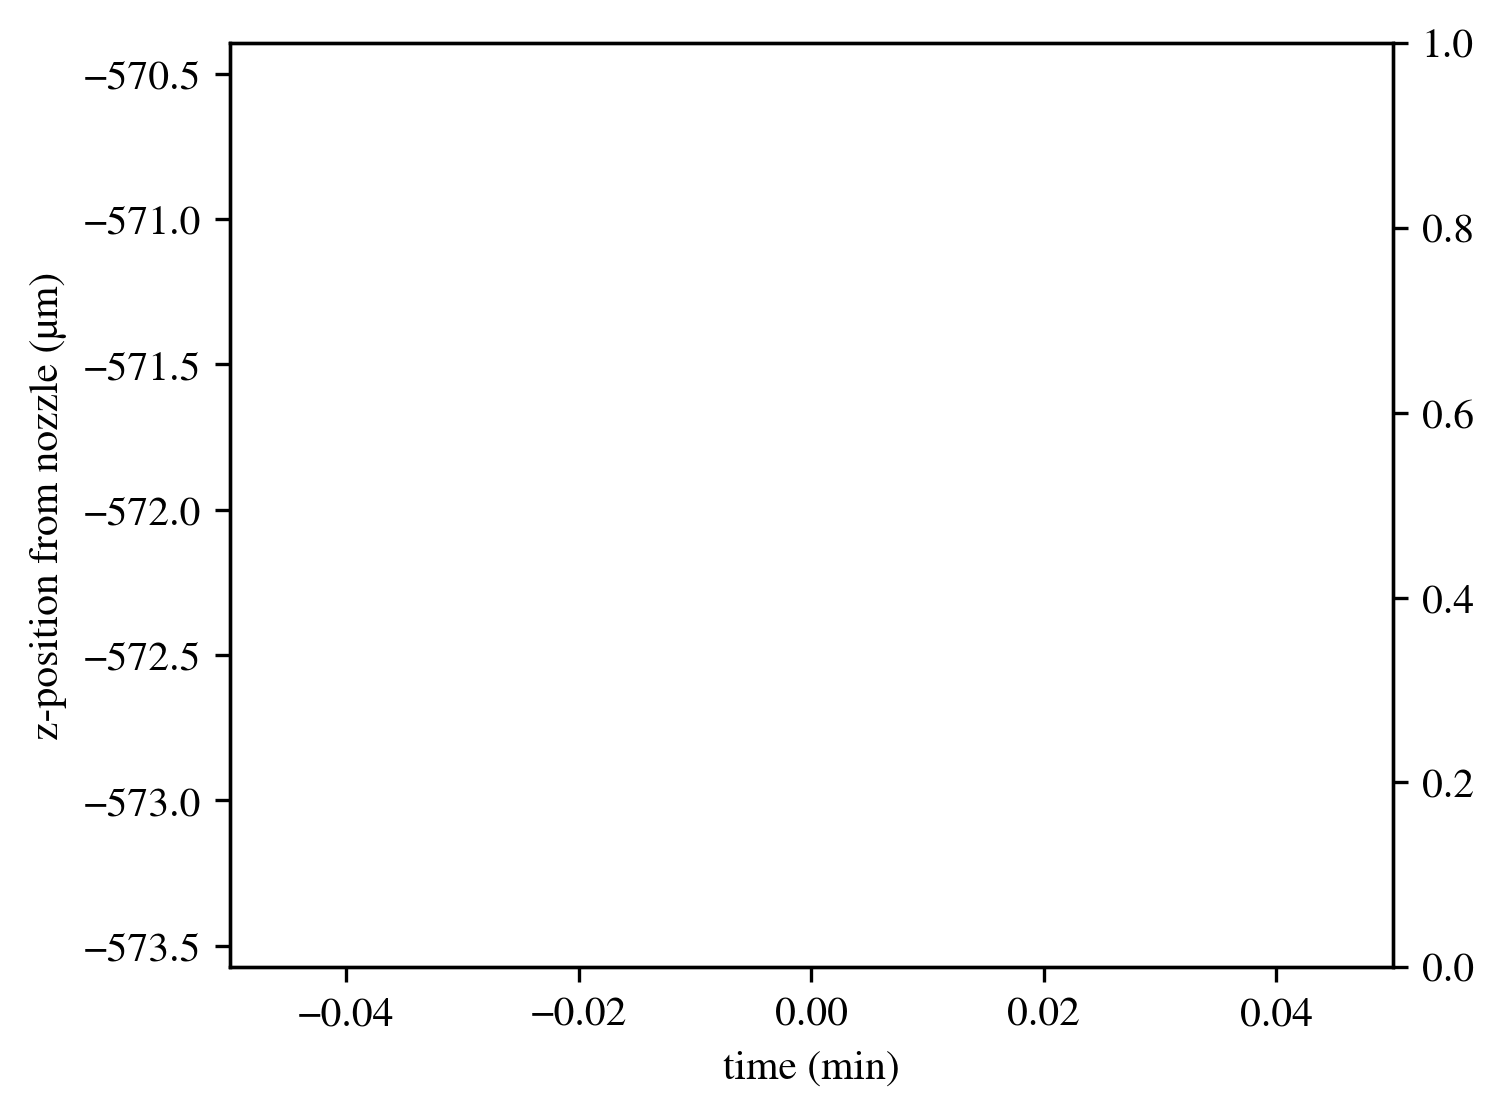

In [2]:
res = np.load('res2.npy')

#res = video_frames

res = res - np.median(res, axis=0)
res = res.T - np.median(res.T, axis=0)
res = res.T
print(np.max(res))
res[res>3000] = 3000


res[:,0:96] = np.min(res)
numberOfPixels = 257
Length = 25400/4/10
fps = 44.4
extent = np.array([0, frame_count/fps/60, -1375, res.shape[1]*Length/numberOfPixels-1375])
plt.rcParams['figure.figsize'] = [5, 4]  # [width, height] in inches
plt.imshow(res.T,aspect=.025,cmap='bone',extent=extent)
plt.ylabel('z-position from nozzle (µm)')
plt.xlabel('time (min)')


ax3 = plt.twinx()
ax3.plot(x_data/60, y_data/1e3, color=mr)
ax3.set_ylim(-1.170, -.900)  # Replace these values with your desired limits
#ax3.set_xlim(-0, -46)  # Replace these values with your desired limits
print(ax3.get_xlim())
ax3.set_xlim(-0, 45.5)  # Replace these values with your desired limits
ax3.set_ylabel('Liquid flowrate (µL/min)', color=mr)
# Get the current y-axis tick locations
y_ticks = -ax3.get_yticks()
print(y_ticks)

# Set the modified tick labels
ax3.set_yticklabels([f"{value:.2f}" for value in y_ticks], color=mr)
ax3.spines['right'].set_color(mr)
fig.tight_layout()  # Adjust the layout of the plot


plt.savefig('Results/waterfall56.pdf', format='pdf', dpi=300)
plt.savefig('Results/waterfall56.png', dpi=300)

plt.show()


In [ ]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [5, 3]  # [width, height] in inches


fig = plt.figure()


gs = GridSpec(1, 10)

# Define the subplots' positions
ax1 = fig.add_subplot(gs[0, :3])  # First subplot, takes 1/3rd of space
ax2 = fig.add_subplot(gs[0, 3:])  # Second subplot, takes 2/3rd of space

extent = np.array([0, sframe[:,:].shape[1]*Length/numberOfPixels, -1375, sframe[:,:].shape[0]*Length/numberOfPixels-1375])
ax1.imshow(sframe[:,:],cmap='bone',extent=extent)
ax1.set_xlabel('X-position (µm)')
ax1.set_ylabel('Z-position (µm)')
ax1.xaxis.set_major_locator(plt.MaxNLocator(nbins=3))
ax1.grid(True)
ax1.grid(True, which='minor', linestyle='--', linewidth=0.5)


extent = np.array([0, frame_count/fps/60, -1375, res[:,:].shape[1]*Length/numberOfPixels-1375])
#axs[1].imshow(res[(161107-1000):161107,:].T,aspect=.05,cmap='bone',extent=extent)
ax2.imshow(res[:,:].T,aspect=0.025,cmap='bone',extent=extent)
ax2.set_xlabel('Time (min)')
ax2.set_yticklabels([])
ax2.xaxis.set_major_locator(plt.MaxNLocator(nbins=4))
ax2.grid(True)

# Add an inset plot on ax2
inset_ax = ax2.inset_axes([0.2, 0.7, 0.8, 0.3])#[height="30%", width="80%", loc='upper center'])

extent = np.array([0, 1872/fps, -600, 72*Length/numberOfPixels-600])
inset_ax.imshow(res[:1872,280:(280+72)].T, aspect=0.04,cmap='bone',extent=extent)  # Example data for the inset plot
#inset_ax.set_yticklabels([])
inset_ax.set_xlabel('time (s)')
#ax2.indicate_inset_zoom(inset_ax, edgecolor="black")


# Initialize empty lists to store data
x_data = []
y_data = []

# Open and read the CSV file line by line
with open('/bioxfel/data/kirianlab/projects/triggered-droplets/20231030/flowrate.csv', 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        fields = line.strip().split(',')
        x_data.append(float(fields[2]))  # Index 2 corresponds to 'x0001'
        y_data.append(float(fields[3]))  # Index 3 corresponds to 'y0001'

x_data = np.array(x_data)
y_data = np.array(y_data)
xcut = -2785.17
y_data = y_data[x_data>xcut] 
x_data = x_data[x_data>xcut]
x_data = x_data-xcut



fig.tight_layout()  # Adjust the layout of the plot

plt.savefig('Results/droplet_waterfall56.pdf', format='pdf', dpi=300)
plt.savefig('Results/droplet_waterfall56.png', dpi=300)
plt.show()

In [5]:
60/64.1025641025641*2000

1872.0

In [6]:
res[:,0:50] = res[:,50:100]
autocorr = np.zeros(res.shape[0], dtype=float)
med = np.median(res)
def find_max_parabolic(data):
    # Find the index of the maximum value
    max_index = np.argmax(data)
    vals = data[max_index+np.arange(-1,2)]
    slope = (vals[2]-vals[0])/2
    curve = vals[2]-2*vals[1]+vals[0]
    x= -(slope/(2*curve))
    return max_index+x
for i in range(res.shape[0]):
    corrfunc = np.correlate(res[0, :]-med, res[i, :]-med, mode='full')
    autocorr[i] = find_max_parabolic(corrfunc)
    if i%10000==0:
        print(i)

0
10000
20000
30000
40000
50000


/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000


In [7]:
autocorr_fixed = autocorr.astype(np.float64)
autocorr_fixed[(autocorr_fixed > 600) | (autocorr_fixed < 300)] = np.nan

shift = (autocorr_fixed-np.nanmean(autocorr_fixed))*Length/numberOfPixels

/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


21.956842695253336


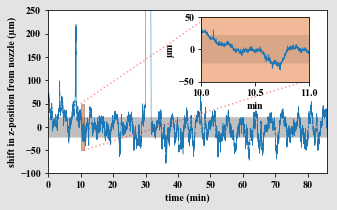

In [8]:
time = np.arange(0,res.shape[0])/fps/60
flow_rate = 4.2  # Liquid volume flow rate in uL/min
frequency = 1000.0  # Frequency in Hz

# Convert flow rate to mL/min
droplet_volume = flow_rate*1.66667e-11 / frequency

main_droplet_volume = ((5/6)**3+1)**-1*droplet_volume

diameter = (6 * main_droplet_volume / np.pi) ** (1/3)

droplet_radius = diameter*1e6/2

print(droplet_radius)
fig = plt.figure()
fig.set_facecolor((228/255, 227/255, 227/255))

plt.rcParams['figure.figsize'] = [10, 4]  # [width, height] in inches
plt.fill_between(time, time*0+droplet_radius, time*0-droplet_radius,alpha=.25, linewidth=0,color='black')
plt.plot(time, shift,linewidth=0.5)
plt.ylabel('shift in z-position from nozzle (µm)')
plt.xlabel('time (min)')
plt.ylim([-100,250])


# Set the limits for the zoomed-in plot
zoom_xlim = [10, 11]
zoom_ylim = [-50, 50]

lx = [zoom_xlim[0], 48, np.nan,zoom_xlim[1], 80]
ly = [zoom_ylim[1], 230, np.nan,zoom_ylim[0], 100]
plt.plot(lx,ly,'r:',alpha=0.4)
# Add a rectangle to highlight the zoomed-in region
rect = plt.Rectangle((zoom_xlim[0], zoom_ylim[0]), zoom_xlim[1] - zoom_xlim[0], zoom_ylim[1] - zoom_ylim[0], edgecolor='black', facecolor=mr, alpha=0.5,linestyle='-', linewidth=0.5)
plt.gca().add_patch(rect)
plt.gca().set_xlim([0,np.max(time)])

# Create the zoomed-in axis
left, bottom, width, height = [0.55, 0.55, 0.3, 0.3]
ax_zoom = plt.gcf().add_axes([left, bottom, width, height],facecolor=lmr)



ax_zoom.set_xlim(zoom_xlim)
ax_zoom.set_ylim(zoom_ylim)

# Plot the zoomed-in data
ax_zoom.plot(time, shift, linewidth=0.5)
ax_zoom.fill_between(time, time*0+droplet_radius, time*0-droplet_radius,alpha=.1, linewidth=0,color='black')
ax_zoom.set_ylabel("µm")
ax_zoom.set_xlabel("min")


plt.savefig('Results/drift.pdf', format='pdf')
plt.savefig('Results/drift.png', dpi=300)

plt.show()


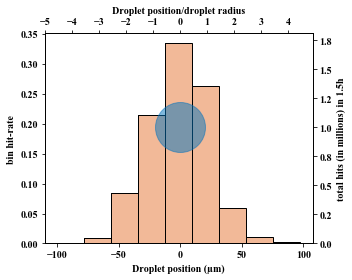

In [9]:
Y = plt.hist(shift, bins=np.arange(-100,100,droplet_radius), density=False)
plt.rcParams['figure.figsize'] = [5, 4]  # [width, height] in inches
plt.close()
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots()
plt.rcParams['figure.figsize'] = [5, 4]  # [width, height] in inches

ax1.bar(.5*(Y[1][1:]+Y[1][:-1]),Y[0]/frame_count,droplet_radius,**{'facecolor': 'black'})
ax1.set_xlabel('Droplet position (µm)')
ax1.set_ylabel('bin hit-rate', color='black')

ax2 = ax1.twinx()
ax2.bar(.5*(Y[1][1:]+Y[1][:-1]),Y[0]*1000/fps,droplet_radius,**{'edgecolor': 'black'},**{'facecolor': lmr})
ax2.plot(0,1e6,color=mb, marker='o', markersize=50, alpha=0.5)
ax2.set_ylabel('total hits (in millions) in 1.5h', color='black')
# Define the formatting function for y-tick labels
def format_y_ticks(value, _):
    return f'{value / 1e6:.1f}'
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))


ax3 = ax1.twiny()
ax3.bar(.5*(Y[1][1:]+Y[1][:-1])/droplet_radius,0*Y[0]*1000/fps,1,**{'edgecolor': 'black'})
ax3.set_xlabel('Droplet position/droplet radius', color='black')
ax3.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
fig.tight_layout()  # Adjust the layout of the plot

fig.savefig('Results/hitrate_analysis.pdf', format='pdf')
plt.savefig('Results/hitrate_analysis.png', dpi=300)


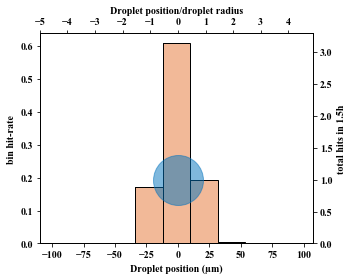

In [10]:
Y = plt.hist(shift/2, bins=np.arange(-100,100,droplet_radius), density=False)
plt.close()
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots()

ax1.bar(.5*(Y[1][1:]+Y[1][:-1]),Y[0]/frame_count,droplet_radius,**{'facecolor': 'black'})
ax1.set_xlabel('Droplet position (µm)')
ax1.set_ylabel('bin hit-rate', color='black')

ax2 = ax1.twinx()
ax2.bar(.5*(Y[1][1:]+Y[1][:-1]),Y[0]*1000/fps,droplet_radius,**{'edgecolor': 'black'},**{'facecolor': lmr})
ax2.plot(0,1e6,color=mb, marker='o', markersize=50, alpha=0.5)
ax2.set_ylabel('total hits in 1.5h', color='black')
# Define the formatting function for y-tick labels
def format_y_ticks(value, _):
    return f'{value / 1e6:.1f}'
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))


ax3 = ax1.twiny()
ax3.bar(.5*(Y[1][1:]+Y[1][:-1])/droplet_radius,0*Y[0]*1000/fps,1,**{'edgecolor': 'black'})
ax3.set_xlabel('Droplet position/droplet radius', color='black')
ax3.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
fig.tight_layout()  # Adjust the layout of the plot

fig.savefig('Results/hitrate_analysis_2.pdf', format='pdf')
plt.savefig('Results/hitrate_analysis_2.png', dpi=300)



In [11]:
alpha = np.linspace(0,80,10)
hitrate = np.linspace(0,80,10)

for i in range(len(alpha)):
    Y = plt.hist(shift*np.cos(alpha[i]*np.pi/180), bins=np.arange(-100,100,droplet_radius), density=False)
    plt.close()
    hitrate[i] = np.max(Y[0])/frame_count


[100 108 117 126 135 144 153 162 171 180]
(10, 480, 128)


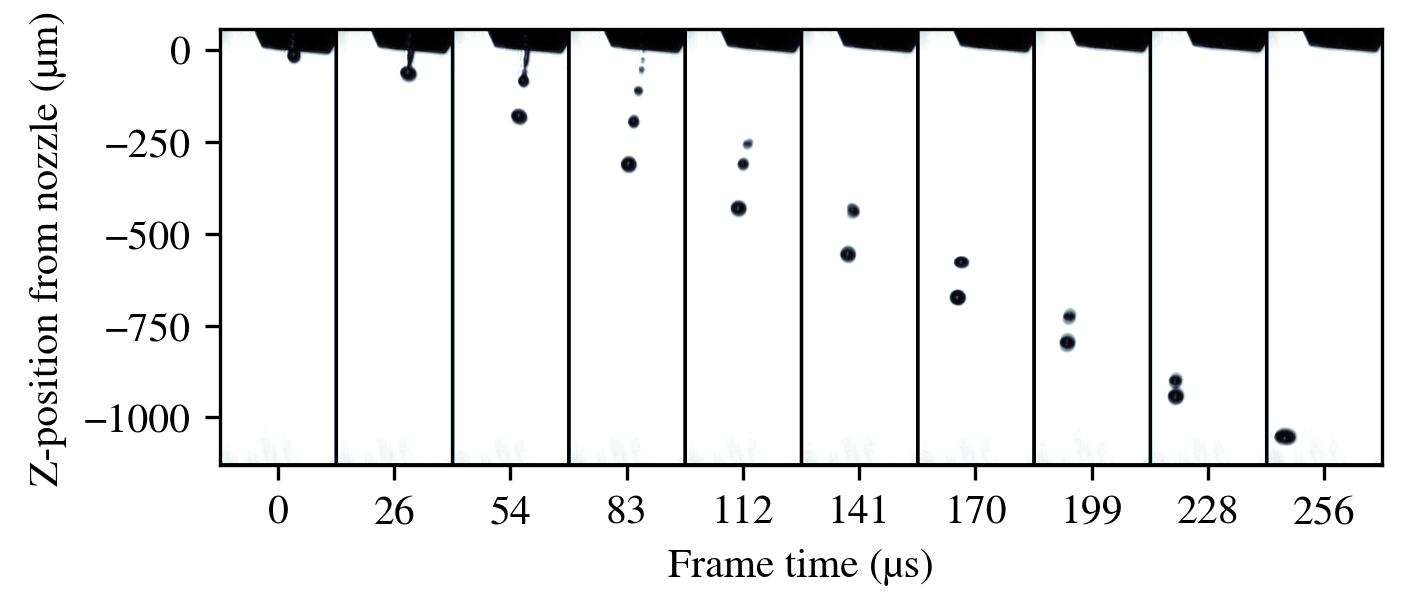

In [3]:
from skimage import io
import os
path = '/data/bioxfel/data/kirianlab/projects/triggered-droplets/20230607/'

filename = 'animation_1.tif'

file_path = os.path.join(path, filename)
im = io.imread(file_path)
fps = 31.2

sf = 100
ind = np.linspace(sf, sf+80, 10, dtype=int)
print(ind)
extracted_frames = im[ind,:,4:-4]
extracted_frames[:,:2, :] = 0
extracted_frames[:,-2:, :] = 0
extracted_frames[:,:, :2] = 0
extracted_frames[:,:, -2:] = 0
print(extracted_frames.shape)
combined_frames = np.hstack(extracted_frames)
extent = np.array([0, combined_frames.shape[1]*Length/numberOfPixels, -1130, combined_frames.shape[0]*Length/numberOfPixels-1130])
fig = plt.figure()
plt.rcParams['figure.figsize'] = [5, 3]  # [width, height] in inches

plt.imshow(combined_frames, cmap='bone',extent=extent)
plt.ylabel('Z-position from nozzle (µm)')
#xlabel
hpoints = np.linspace(0, combined_frames.shape[1]*Length/numberOfPixels,11)
hpoints = (hpoints[1:]+hpoints[:-1])/2
tpoints = (ind-ind[0])/fps/1e4*1e6
plt.xticks(hpoints)
custom_xticklabels = ['{:.0f}'.format(xtick) for xtick in tpoints]
plt.gca().set_xticklabels(custom_xticklabels)
plt.xlabel('Frame time (µs)')


#plt.grid(linestyle='dotted', color='white', axis='y')

#plt.tight_layout()  # Adjust the layout of the plot
plt.rcParams['figure.figsize'] = [5, 3]  # [width, height] in inches
plt.savefig('Results/animation.pdf', format='pdf', dpi=300)
plt.savefig('Results/animation.png', dpi=300)

plt.show()

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 10 14:33:00 2023

@author: aansa
"""

from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300

# Set the font family to Times New Roman

#mpl.rcParams['font.family'] = 'sans-serif'
#mpl.rcParams['font.weight'] = 'normal'
#mpl.rcParams['font.sans-serif'] = ['Tahoma']
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams["axes.titleweight"] = "normal"

path = ''
numberOfPixels = 257
Length = 25400/4/10

filename = '/bioxfel/data/kirianlab/projects/triggered-droplets/20231003/dataDrip.tif'

file_path = os.path.join(path, filename)
im = io.imread(file_path)
im = im[:,64:(64+450),(134-64):(134+64)]
fps = 14

sf = 137
ind = np.linspace(sf, sf+18, 10, dtype=int)
print(ind)
extracted_frames = im[ind,:,4:-4]
extracted_frames[:,:2, :] = 0
extracted_frames[:,-2:, :] = 0
extracted_frames[:,:, :2] = 0
extracted_frames[:,:, -2:] = 0
combined_frames = np.hstack(extracted_frames)
extent = np.array([0, combined_frames.shape[1]*Length/numberOfPixels, -1130, combined_frames.shape[0]*Length/numberOfPixels-1130])#865
plt.rcParams['figure.figsize'] = [5, 3]  # [width, height] in inches

plt.imshow(combined_frames, cmap='bone',extent=extent, vmin=32, vmax=128)
plt.ylabel('Z-position from nozzle (µm)')
#xlabel
hpoints = np.linspace(0, combined_frames.shape[1]*Length/numberOfPixels,11)
hpoints = (hpoints[1:]+hpoints[:-1])/2
tpoints = (ind-ind[0])/fps/1e4*1e6
plt.xticks(hpoints)
custom_xticklabels = ['{:.0f}'.format(xtick) for xtick in tpoints]
plt.gca().set_xticklabels(custom_xticklabels)
plt.xlabel('Frame time (µs)')


#plt.grid(linestyle='dotted', color='white', axis='y')

#plt.tight_layout()  # Adjust the layout of the plot
plt.rcParams['figure.figsize'] = [5, 3]  # [width, height] in inches
plt.savefig('Results/animation2.pdf', format='pdf', dpi=300)
plt.savefig('Results/animation2.png', dpi=300)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/bioxfel/data/kirianlab/projects/triggered-droplets/20231003/dataDrip.tif'

(501, 650, 308)
(501, 650, 308)
(12, 650, 308)
[730 738 746 754 762 770 778 786 794 802]
t 0 255


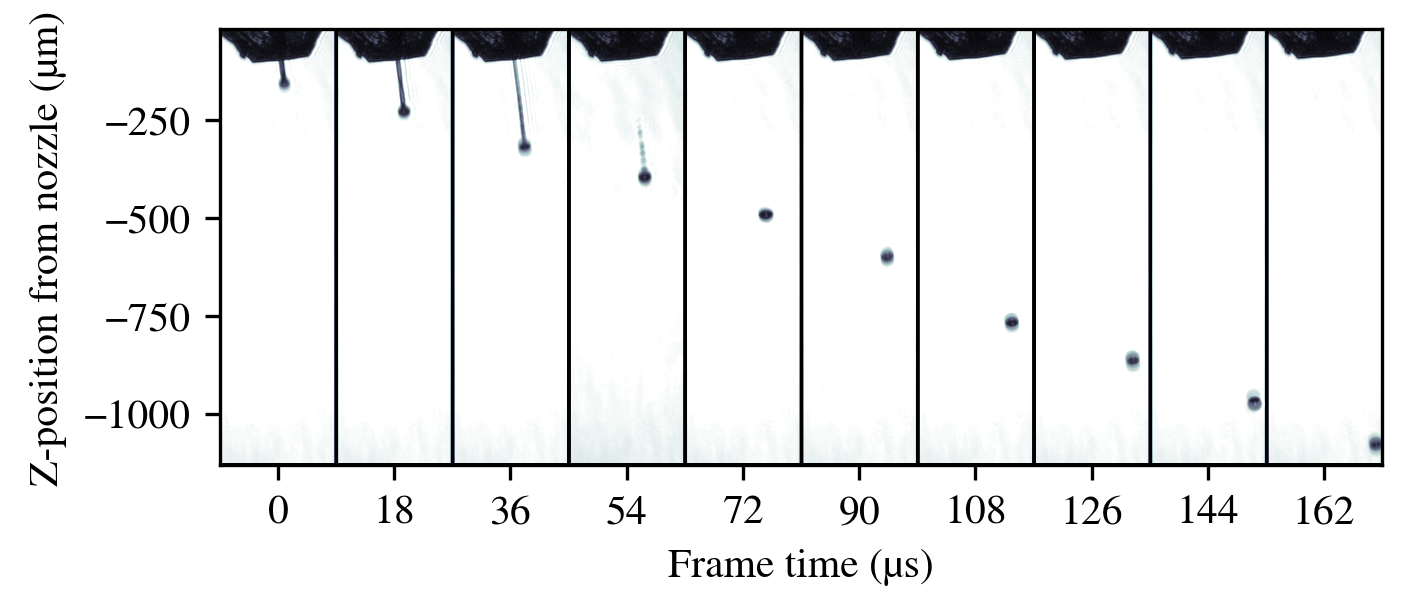

In [15]:
import os
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Nimbus Roman'

path = '/data/bioxfel/data/kirianlab/projects/triggered-droplets/20231030/'
filenames = ['anim.tif', 'anim_1.tif', 'anim_2.tif']

numberOfPixels = 257
Length = 25400/4/10

# Create an empty list to store the images
images = []

# Loop through the filenames
for filename in filenames:
    file_path = os.path.join(path, filename)
    im = io.imread(file_path)
    print(im.shape)
    images.append(im)

stacked_images = np.concatenate(images, axis=0)

im = stacked_images[:,64:(64+450),(160-64):(160+64)]
fps = 44.4

sf = 730
ind = np.linspace(sf, sf+72, 10, dtype=int)
print(ind)
extracted_frames = im[ind,:,4:-4]
extracted_frames[:,:2, :] = 0
extracted_frames[:,-2:, :] = 0
extracted_frames[:,:, :2] = 0
extracted_frames[:,:, -2:] = 0
print("t",np.min(extracted_frames), np.max(extracted_frames))
#extracted_frames[extracted_frames>180] = 255
extracted_frames = ((extracted_frames/255)**.65)*255
combined_frames = np.hstack(extracted_frames)
extent = np.array([0, combined_frames.shape[1]*Length/numberOfPixels, -1130, combined_frames.shape[0]*Length/numberOfPixels-1130])#865
plt.rcParams['figure.figsize'] = [5, 3]  # [width, height] in inches

plt.imshow(combined_frames, cmap='bone',extent=extent, vmin=0, vmax=190)
plt.ylabel('Z-position from nozzle (µm)')
#xlabel
hpoints = np.linspace(0, combined_frames.shape[1]*Length/numberOfPixels,11)
hpoints = (hpoints[1:]+hpoints[:-1])/2
tpoints = (ind-ind[0])/fps/1e4*1e6
plt.xticks(hpoints)
custom_xticklabels = ['{:.0f}'.format(xtick) for xtick in tpoints]
plt.gca().set_xticklabels(custom_xticklabels)
plt.xlabel('Frame time (µs)')
plt.rcParams['figure.figsize'] = [5, 3]  # [width, height] in inches
plt.savefig('Results/animation2.pdf', format='pdf', dpi=300)
plt.savefig('Results/animation2.png', dpi=300)
plt.show()

In [13]:
from scipy.signal import savgol_filter

ind = np.arange(sf, sf+80, 1, dtype=int)
print(ind)
extracted_frames = im[ind,35:,:]
hsum = np.sum(extracted_frames,axis=2)
print(extracted_frames.shape)
print(hsum.shape)
min_indices = np.argmin(hsum[:, :], axis=1)
print(min_indices)
tpoints = (ind-ind[0])/fps/1e4*1e6
dpoints = min_indices*Length/numberOfPixels
smoothed_dpoints = savgol_filter(dpoints, window_length=9, polyorder=2)

velocity = np.gradient(smoothed_dpoints, tpoints)
smoothed_velocity = savgol_filter(velocity, window_length=9, polyorder=2)
plt.plot(tpoints, smoothed_velocity)

plt.show()

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179]
(80, 445, 136)
(80, 445)
[  0   0   0   0   3   7  10  13  14  18  24  31  37  43  46  51  56  62
  67  74  79  80  91  97 104 110 114 118 123 129 136 142 148 152 156 162
 169 171 180 185 189 192 200 207 213 218 224 227 233 237 244 252 256 262
 264 271 277 283 290 293 299 304 310 324 330 333 337 343 350 352 362 368
 374 378 383 390 394 398 405 406]


In [14]:
from scipy.signal import correlate
autocorr = correlate(extracted_frames[20,:,:], extracted_frames[21,:,:], mode='same', method='fft')
pixel_shifts = np.argmax(autocorr, axis=1)
print(pixel_shifts)

[133   1 105  93  89  33  90  45  58  71  74 127  43   3  96 117  20  66
  83  29 106  30  86  63  90   4   7  12 112  11 119  73   4  97  32  85
 119  22 101  47  14  45  11  12 109  40  44 129  20  26   6  37  53  89
 119 110  18   4  10  12  48 128  98   9 126 113 119 106  30  31 135 103
  13   9 121  12  33  17   2 109  20  10 120  17 130 122  17 125   0   4
  37  12  15  14 127   6   3 114  32 132 125   7 116   0 103  28 109  12
 105  20 113  22  20  24  29 110   1 112 117 133 121   4 123  11 127 128
  23 115  22  15  10 118 134 112   6   0 121 131 126 126 126   0 117 132
 131 115 126  15   8 132 124  22 115   6 128   2   8 118 122 129 125  14
   0   4  14 135   2  12 120 125   4 131   7   5  11 133 124 131  15  11
 123  13   9   9 130   1 129 135 131 130   8 130 126   8   3   0   7   7
   1 133 128   9  10 125 130 131 128   6   5   9 127   2   6   5   0 134
   5 128   8   6 132 135   1 135   5 132 129   0   0 129   0 129   1   8
   4   7 128 128   2 126 134 133  11 131 128  11  1

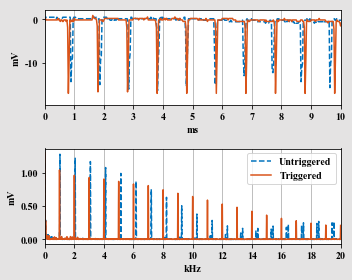

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Specify the file paths and names of the CSV files
freq_csv_file = '/data/bioxfel/data/kirianlab/projects/triggered-droplets/20230606/Frequency.csv'
voltage_csv_file = '/data/bioxfel/data/kirianlab/projects/triggered-droplets/20230606/Voltage.csv'
freq_csv_file1 = '/data/bioxfel/data/kirianlab/projects/triggered-droplets/20230614/Frequency1.csv'
voltage_csv_file1 = '/data/bioxfel/data/kirianlab/projects/triggered-droplets/20230614/Voltage1.csv'

# Read the Frequency.csv file into a NumPy array
freq_data = np.genfromtxt(freq_csv_file, delimiter=',')

# Extract the columns from Frequency.csv
freq_column1 = freq_data[:, 0]
freq_column2 = freq_data[:, 1]
freq_column3 = freq_data[:, 2]

# Read the Frequency1.csv file into a NumPy array
freq_data1 = np.genfromtxt(freq_csv_file1, delimiter=',')

# Extract the columns from Frequency1.csv
freq_column1_1 = freq_data1[:, 0]
freq_column2_1 = freq_data1[:, 1]
freq_column3_1 = freq_data1[:, 2]

# Read the Voltage.csv file into a NumPy array
voltage_data = np.genfromtxt(voltage_csv_file, delimiter=',')

# Extract the columns from Voltage.csv
voltage_column1 = voltage_data[:, 0]
voltage_column2 = voltage_data[:, 1]

# Read the Voltage1.csv file into a NumPy array
voltage_data1 = np.genfromtxt(voltage_csv_file1, delimiter=',')

# Extract the columns from Voltage1.csv
voltage_column1_1 = voltage_data1[:, 0]
voltage_column2_1 = voltage_data1[:, 1]

plt.rcParams['figure.figsize'] = [5, 4]  # [width, height] in inches

# Create a figure and subplots
fig, axs = plt.subplots(2, 1)
fig.set_facecolor((228/255, 227/255, 227/255))

# Plot Frequency.csv in the second subplot
axs[1].plot(freq_column1_1, freq_column2_1, color=mb, linestyle='--', label='Untriggered')  # Add data from Frequency1.csv with dotted linestyle
axs[1].plot(freq_column1, freq_column2, color=mr, label='Triggered')
axs[1].set_xlim([0, 20000])
yticks = axs[1].get_yticks()
yticklabels = [f'{label*1e3:.2f}' for label in yticks]
axs[1].set_yticklabels(yticklabels)
axs[1].set_xticks(np.linspace(0, 20000, 11))
axs[1].set_xticklabels([f'{label*1e-3:.0f}' for label in axs[1].get_xticks()])
axs[1].set_xlabel('kHz')
axs[1].set_ylabel('mV')
axs[1].grid(axis='x')
axs[1].legend()

# Plot Voltage.csv in the first subplot
axs[0].plot(voltage_column1_1, voltage_column2_1, color=mb, linestyle='--', label='Untriggered')  # Add data from Voltage1.csv with dotted linestyle
axs[0].plot(voltage_column1, voltage_column2, color=mr, label='Triggered')
axs[0].set_xlim([0, 0.01])
yticks = axs[0].get_yticks()
yticklabels = [f'{label*1e3:.0f}' for label in yticks]
axs[0].set_yticklabels(yticklabels)
axs[0].set_xticks(np.linspace(0, 0.01, 11))
axs[0].set_xticklabels([f'{label*1e3:.0f}' for label in axs[0].get_xticks()])
axs[0].set_xlabel('ms')
axs[0].set_ylabel('mV')
axs[0].grid(axis='x')
#axs[0].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure
plt.savefig('Results/signalFFT.pdf', format='pdf')
plt.savefig('Results/signalFFT.png', dpi=300)

# Display the subplots
plt.show()


In [16]:
print(droplet_radius)

21.956842695253336


In [17]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun  8 22:04:36 2023

@author: aansa
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
mb = (0, 0.4470, 0.7410)
mr = (0.8500, 0.3250, 0.0980)
lmr = (0.9500, 0.7250, 0.5980)
lmb = (0.5, 0.7470, 0.8710)

rc('font', family='Times New Roman')

# Define constants
rho = 1000
deltaP = 101325 / 10
freq = np.array([120, 1000])
freq.shape = (2,1)

# Define flowrate range
Q = np.linspace(1, 20, 50) * 1.6666666666666666666e-11

# Calculate diameter for sphere drops
d_sphere = (6 / np.pi * Q / freq) ** (1 / 3)

# Calculate diameter for cylindrical jet
d_cylindrical = (Q / np.pi) ** 0.5 * (8 * rho / deltaP) ** 0.25

# Calculate relative efficiency
efficiency_sphere = d_sphere / Q
efficiency_cylindrical = d_cylindrical / Q

fig, axs = plt.subplots(2, 1, figsize=(5, 4))

# Plot diameter as a function of flowrate
axs[0].plot(Q, d_sphere[0, :], color=mb, linestyle='--', linewidth=2)
axs[0].plot(Q, d_sphere[1, :], color=mb, linestyle=':', linewidth=2)
axs[0].plot(Q, d_cylindrical, color=mr, linestyle='-', linewidth=1.5)

axs[0].set_ylabel('Diameter (μm)')
axs[0].set_xticklabels((axs[0].get_xticks() / 1.66667e-11).round(2))
axs[0].set_yticklabels((axs[0].get_yticks() * 1e6).round(3))
axs[0].grid(True)
axs[0].set_xticklabels([''] * len(axs[0].get_xticks()))

# Plot relative efficiency as a function of flowrate
axs[1].semilogy(Q, efficiency_sphere[0, :], color=mb, linestyle='--', linewidth=2)
axs[1].semilogy(Q, efficiency_sphere[1, :], color=mb, linestyle=':', linewidth=2)
axs[1].semilogy(Q, efficiency_cylindrical, color=mr, linestyle='-', linewidth=1.5)
axs[1].set_xlabel('Flowrate (μL/min)')
axs[1].set_ylabel('Relative Efficiency')
axs[1].set_xticklabels((axs[1].get_xticks() / 1.66667e-11).round(2))
axs[1].grid(True)

# Add legend
axs[1].legend(['Sphere Drops (120 Hz)', 'Sphere Drops (1000 Hz)', 'Cylindrical Jet'], loc='center', bbox_to_anchor=(.7, 1))
# Save figure
plt.savefig('Results/Effgain.pdf', format='pdf')
plt.savefig('Results/Effgain.png', dpi=300)

plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


alpha = np.linspace(0, 70, 8)  # degrees

hitrate = np.linspace(0,70,8)
hitrate2 = np.linspace(0,70,8)

for i in range(len(alpha)):
    Y = plt.hist(shift*np.cos(alpha[i]*np.pi/180), bins=np.arange(-2.5*droplet_radius,2.5*droplet_radius,droplet_radius), density=False)
    plt.close()
    hitrate[i] = np.max(Y[0])/frame_count

# Create the figure and the left y-axis
fig, ax1 = plt.subplots()

# Plot the function on the left y-axis
ax1.stem(alpha+20, hitrate)
ax1.invert_xaxis()
ax1.set_xlabel('angle (degrees)')
ax1.set_ylabel('bin hit-rate', color='k')
ax1.set_ylim([0, 1])
# Invert the y-axis
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.grid(axis='y')
# Modify the tick labels
ax1.set_xticklabels(ax1.get_xticks()[::-1])

# Create the right y-axis as a twin of the left y-axis
ax2 = ax1.twinx()

# Scale the right y-axis by a factor of 1000
ax2.set_ylabel('total hits (in millions) in 1.5h', color='k')
scaledf = frame_count*1000/fps
ax2.set_ylim(ax1.get_ylim()[0] * scaledf, ax1.get_ylim()[1] * scaledf)
ax2.tick_params('y', colors='k')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))

cmap = LinearSegmentedColormap.from_list('my_cmap', ['white','white','white','white','white','white','white','white','white','white','white','white','white','white'])
# Add gradient background
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = X

ax1.imshow(Z, cmap=cmap, origin='lower', aspect='auto', extent=[0, 80, -1, 1], alpha=.5)
# Show the plot
plt.tight_layout()

plt.savefig('Results/hitrate.pdf', format='pdf')
plt.savefig('Results/hitrate.png', dpi=300)

plt.show()


## 

In [13]:
import os
import numpy as np
from skimage import io
#filename = '/bioxfel/data/kirianlab/projects/triggered-droplets/20231003/dataDrip.tif'

path = '/bioxfel/data/kirianlab/projects/triggered-droplets/20231030/'
filenames = ['anim.tif', 'anim_1.tif', 'anim_2.tif']

# Create an empty list to store the images
images = []

# Loop through the filenames
for filename in filenames:
    file_path = os.path.join(path, filename)
    im = io.imread(file_path)
    print(im.shape)
    images.append(im)

stacked_images = np.concatenate(images, axis=0)
print(stacked_images.shape)

import matplotlib.pyplot as plt
import numpy as np

# Generate 5 random indices
random_indices = np.random.randint(0, stacked_images.shape[0], size=5)

# Create a 5x1 subplot grid
fig, axs = plt.subplots(1, 5, figsize=(8, 12))

# Iterate over the random indices and plot the corresponding images
for i, index in enumerate(random_indices):
    axs[i].imshow(stacked_images[index,(103-20):(103),177:(177+10)], cmap='gray')
    axs[i].axis('off')  # Turn off the axes
    axs[i].set_title(f'Image {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

(501, 650, 308)
(501, 650, 308)
(12, 650, 308)
(1014, 650, 308)


In [16]:
import cv2
from scipy.interpolate import interp1d
from skimage import measure
fps = 44.4
timed = np.arange(len(stacked_images))/fps/1e4;
pixel_shift = np.zeros(len(stacked_images)) 
mean_shift = np.zeros(len(stacked_images)) 
for i in range(len(stacked_images)):
    gray = stacked_images[i,(103-20):(103),177:(177+10)]
    contours = measure.find_contours(gray, 128)  # adjust the threshold as needed
    contours = np.array(contours[0])

    # Create an interpolation function
    interpolation_func = interp1d(contours[:,1], contours[:,0], kind='linear')

    # Generate new x values for interpolation
    x_values = np.linspace(contours[:,1].min(), contours[:,1].max(), num=100)

    # Perform the interpolation
    interpolated_column2 = interpolation_func(x_values)
    if i==0:
        reference = np.copy(interpolated_column2)
    pixel_shift[i] = np.mean(interpolated_column2-reference)
    mean_shift[i] = np.mean(np.mean(stacked_images[i,(150-20):(150),150:(150+20)]))

    if i%100==0:
        print(i,np.mean(interpolated_column2-reference))
mean_shift -= np.min(mean_shift)

np.save('56anim.npy', [timed, pixel_shift, mean_shift])


0 0.0
100 5.740621339061632
200 8.564247479666166
300 4.462845987689873
400 -0.354948573890356
500 2.109561192370198
600 7.8649889638663675
700 8.529458767448846
800 3.146398743206697
900 0.16767523641311943
1000 5.528980885775903


NameError: name 'mb' is not defined

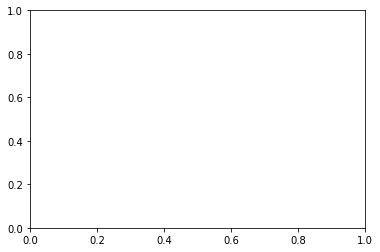

In [3]:
from matplotlib.text import TextPath
numberOfPixels = 257
Length = 25400/4/10
fig, ax1 = plt.subplots()
frequency = 1000  # Frequency of the ramp-down wave
amplitude = 100.0  # Amplitude of the ramp-down wave
ramp_down_wave = amplitude-amplitude * frequency * ((time+.0006111)%(1/frequency))
ax1.plot(time, ramp_down_wave, color=mb, linestyle='--')
ax1.imshow(mean_shift.reshape(1, -1), cmap='gray', extent=[time.min(), time.max(), ramp_down_wave.min(), ramp_down_wave.max()], aspect='auto', alpha=0.3)

ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Piezo signal (Volts) [Dashed line]',color=mb)
# Create the right axis plot for the ramp-down wave
ax2 = ax1.twinx()

ax2.plot(time, -pixel_shift * Length / numberOfPixels, color=mr)

ax2.set_ylabel('GDVN displacement (µm) [Solid Line]', color=mr)


# Multiply x-axis ticks by 1e6 (microseconds)
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x * 1e3:.2f}"))

ax1.set_xlim(0, 0.002)

# Adjust the plot layout
fig.tight_layout()

plt.rcParams['figure.figsize'] = [5, 4]  # [width, height] in inches
plt.savefig('Results/GDVNresponse.pdf', format='pdf', dpi=300)
plt.savefig('Results/GDVNresponse.png', dpi=300)
# Show the plot
plt.show()

(199, 892, 296)
(199, 892, 296)


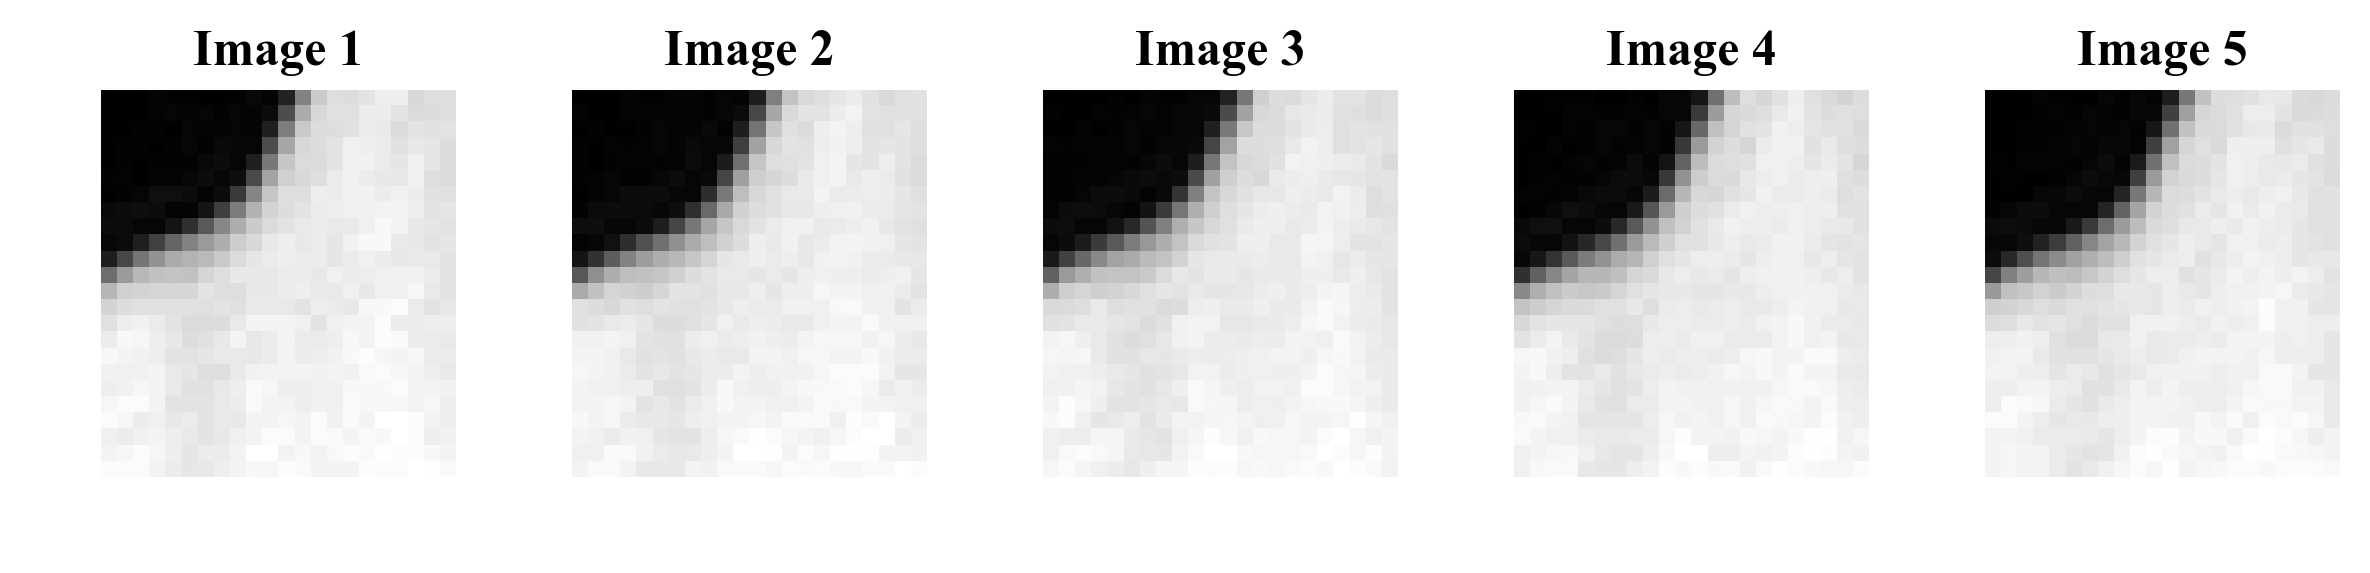

In [82]:
import os
import numpy as np
from skimage import io
#filename = '/bioxfel/data/kirianlab/projects/triggered-droplets/20231003/dataDrip.tif'

path = '/bioxfel/data/kirianlab/projects/triggered-droplets/20231003/'
filenames = ['dataDrip.tif']

# Create an empty list to store the images
images = []

# Loop through the filenames
for filename in filenames:
    file_path = os.path.join(path, filename)
    im = io.imread(file_path)
    print(im.shape)
    images.append(im)

stacked_images = np.concatenate(images, axis=0)
print(stacked_images.shape)

import matplotlib.pyplot as plt
import numpy as np

# Generate 5 random indices
random_indices = np.random.randint(0, stacked_images.shape[0], size=5)

# Create a 5x1 subplot grid
fig, axs = plt.subplots(1, 5, figsize=(8, 12))

# Iterate over the random indices and plot the corresponding images
for i, index in enumerate(random_indices):
    axs[i].imshow(stacked_images[index,59:83,157:179], cmap='gray')
    axs[i].axis('off')  # Turn off the axes
    axs[i].set_title(f'Image {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [83]:
import cv2
from scipy.interpolate import interp1d
from skimage import measure
fps = 14
time2 = np.arange(len(stacked_images))/fps/1e4;
pixel_shift2 = np.zeros(len(stacked_images)) 
mean_shift2 = np.zeros(len(stacked_images)) 
for i in range(len(stacked_images)):
    gray = stacked_images[i,59:83,157:179]
    contours = measure.find_contours(gray, 128)  # adjust the threshold as needed
    contours = np.array(contours[0])

    # Create an interpolation function
    interpolation_func = interp1d(contours[:,1], contours[:,0], kind='linear')

    # Generate new x values for interpolation
    x_values = np.linspace(contours[:,1].min(), contours[:,1].max(), num=100)

    # Perform the interpolation
    interpolated_column2 = interpolation_func(x_values)
    if i==0:
        reference = np.copy(interpolated_column2)
    pixel_shift2[i] = np.mean(interpolated_column2-reference)
    mean_shift2[i] = np.mean(np.mean(stacked_images[i,40:,:-40]))

    if i%10==0:
        print(i,np.mean(interpolated_column2-reference))
mean_shift2 -= np.min(mean_shift2)

0 0.0
10 -0.11214731083423764
20 -0.04229145805363363
30 -0.17464386186095623
40 0.1347165196609791
50 0.2271711236325132
60 0.3565132213985116
70 0.2836621355129407
80 0.3243307153619147
90 0.35787965000961175
100 0.3358231681169261
110 0.1426870703536103
120 -0.09623248921624245
130 0.1773310152451699
140 0.07224476061661313
150 -0.07366124136080687
160 -0.10944971938530293
170 0.05268369218675442
180 0.047427861200314524
190 0.2885910657515149


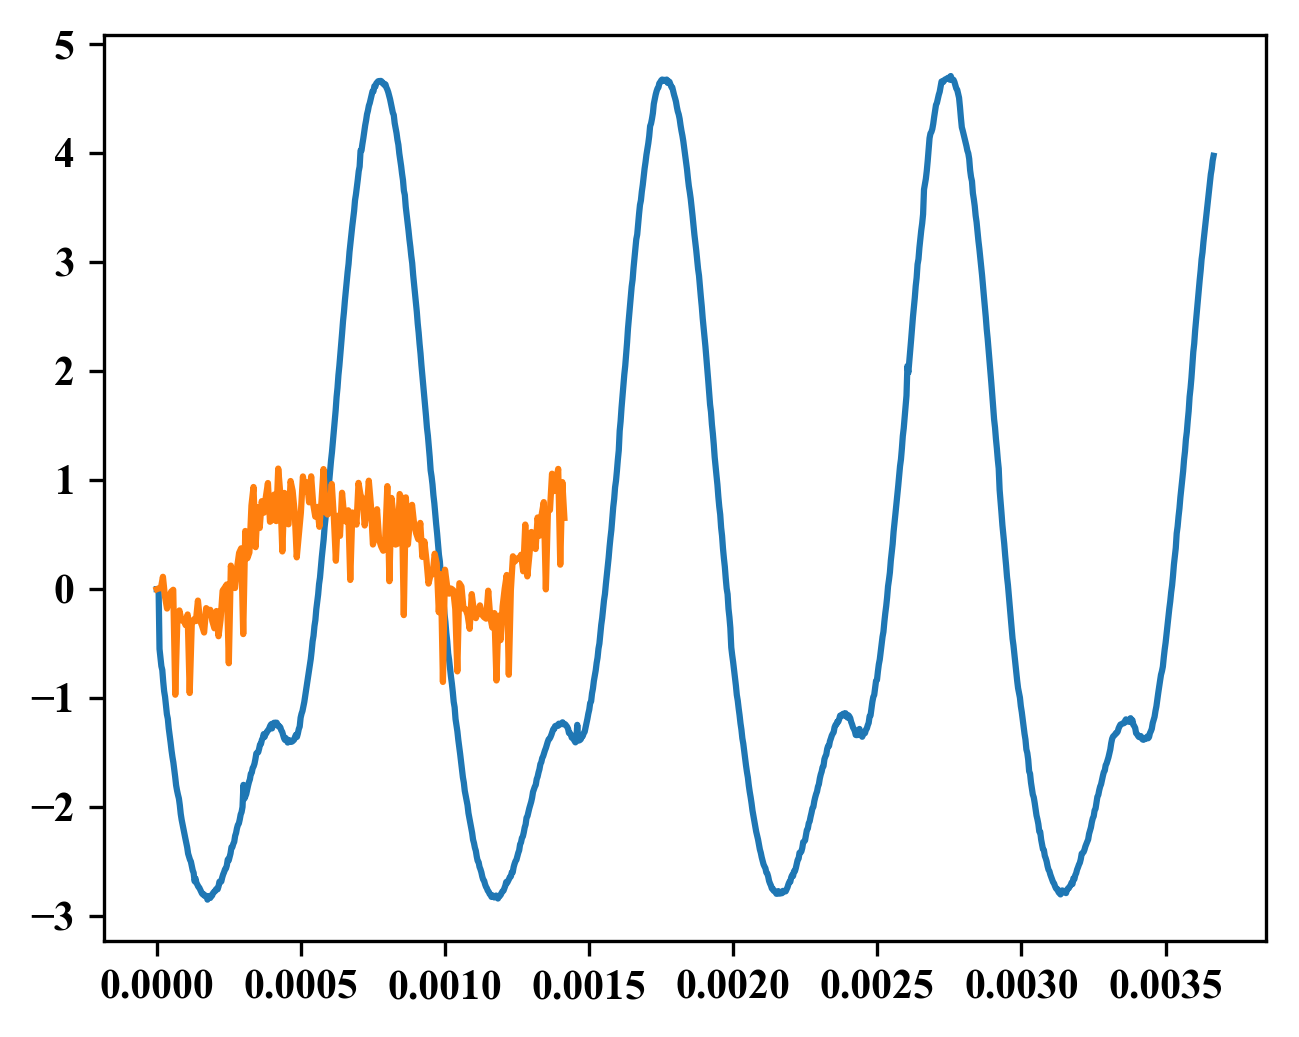

In [87]:
plt.plot(time,pixel_shift* Length / numberOfPixels,time2, pixel_shift2* Length / numberOfPixels)

ValueError: x and y must have same first dimension, but have shapes (1147,) and (199,)

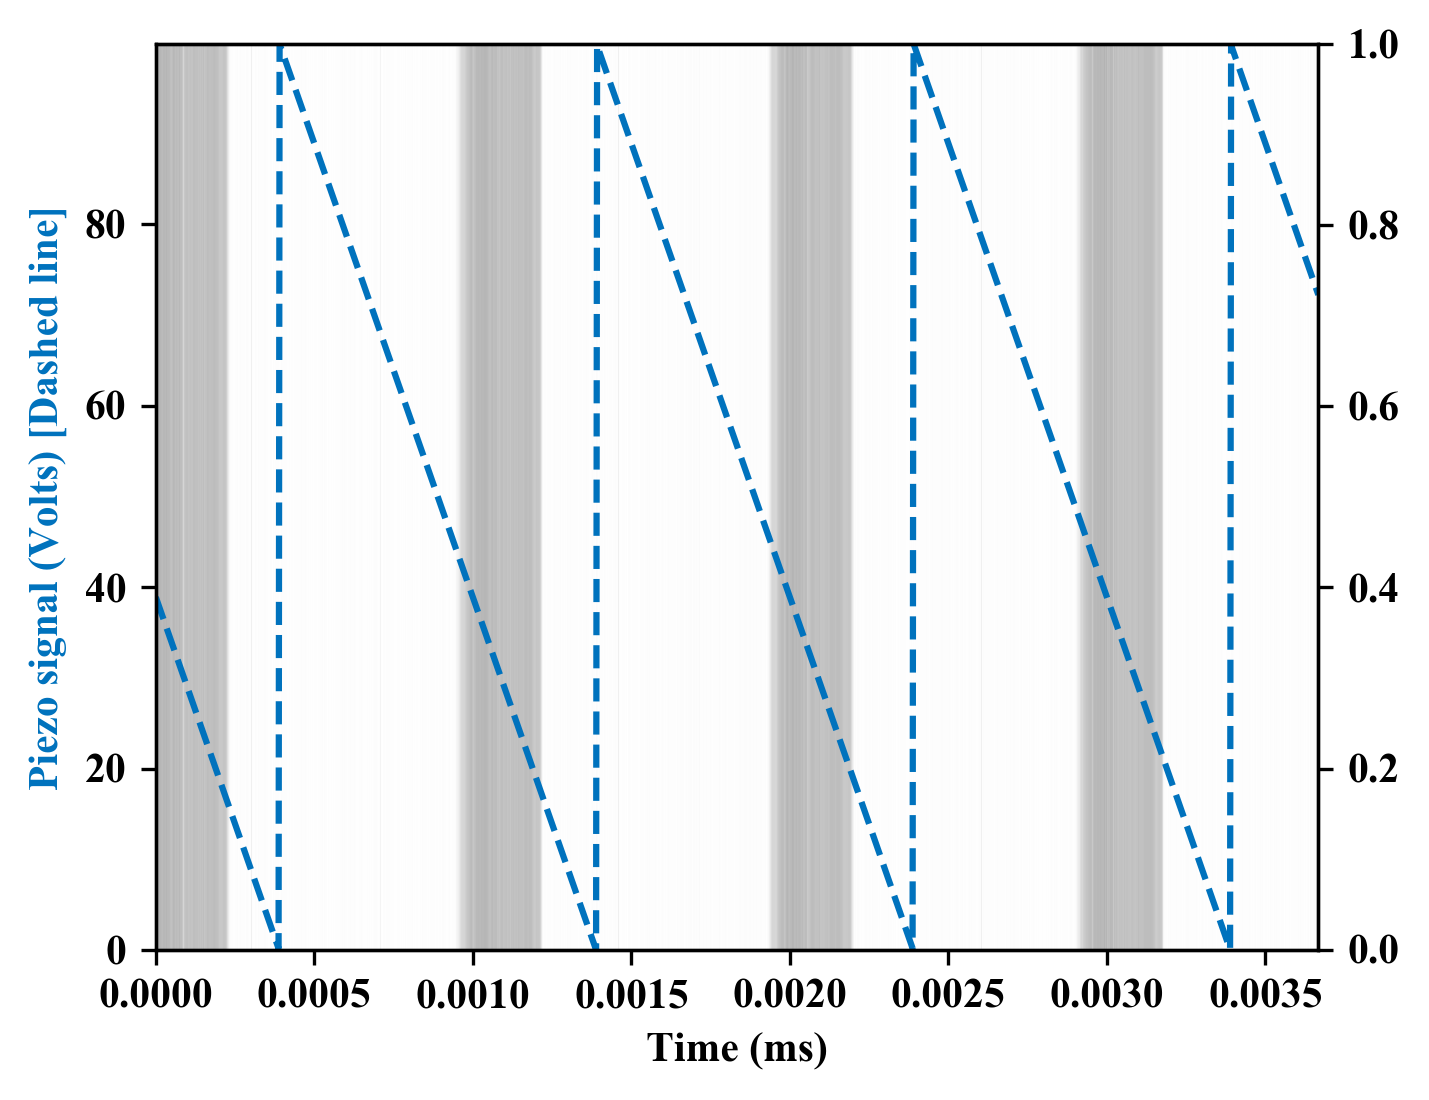

/bioxfel/user/aansari2/axissymmetric_63/triggered/56_7/postProcessing/probes/0/alpha.water
/bioxfel/user/aansari2/axissymmetric_63/triggered/56_7/postProcessing/probes/0.0049/alpha.water
(21138, 502)
(21138, 501)
(21138, 501) (21138, 501)
Closest segment to point (100, 4e-5):
/bioxfel/user/aansari2/axissymmetric_63/triggered/56_8/postProcessing/probes/0/alpha.water
(1780, 502)
(1780, 501)
(1780, 501) (1780, 501)
[2.03456e-05 2.03456e-05 2.07472e-05 ... 2.04962e-05 2.03456e-05
 2.03456e-05] [1.         2.         2.70700608 ... 0.         0.         1.        ]


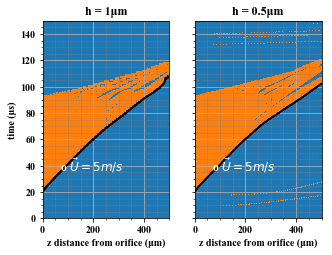

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec

# Create a colormap using tab:blue and tab:orange

def nearestSet(contour_set):
    middle_level = contour_set.levels[len(contour_set.levels) // 2]
    point_of_interest = (100, 4e-5)

    # Extract the contour segments for the middle level
    middle_level_segments = contour_set.collections[len(contour_set.levels) // 2].get_paths()
    #print(middle_level_segments)
    # Find the closest segment to the specified point
    closest_segment = None
    min_distance = float('inf')

    for segment in middle_level_segments:
        for vertex in segment.vertices:
            distance = np.linalg.norm(point_of_interest - vertex)
            if distance < min_distance:
                min_distance = distance
                closest_segment = segment
    return closest_segment

mb = (0.12156863, 0.46666667, 0.70588235)
mr = (1.0, 0.49803922, 0.05490196)
colors = [mb, mr]
cmap = ListedColormap(colors)

# Set Times New Roman as the default font
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'
file_path = '/bioxfel/user/aansari2/axissymmetric_63/triggered/56_7/postProcessing/probes/'

# List all folders in the file_path and sort them
folders = sorted([f for f in os.listdir(file_path) if os.path.isdir(os.path.join(file_path, f))])

# Create file name list
file_names = [os.path.join(file_path, folder, 'alpha.water') for folder in folders]

np_array = np.zeros((1,502))
# Print the file names
for file_name in file_names:
    print(file_name)
    # Read file starting from line 104
    with open(file_name, 'r') as file:
        for _ in range(503):  # Skip lines 1 to 103
            next(file)
        numbers = []
        for line in file:
            values = line.strip().split()
            numbers.append([float(value) for value in values])

    # Convert numbers to a 2D NumPy array
    data_array = np.array(numbers)
    np_array = np.append(np_array, data_array, axis=0)

print(np_array.shape)

first_column = np_array[:,0]  # Extract the first col
remainder_columns = np_array[:,1:]  # Extract the remainder of the col
print(remainder_columns.shape)

y = np.linspace(0, 500, 501)

norm = mcolors.Normalize(vmin=0, vmax=1)

# Create a meshgrid from first_column and y
X, Y = np.meshgrid(y, first_column.ravel())
print(X.shape,Y.shape)

fig = plt.figure(figsize=(5, 4))

gs = gridspec.GridSpec(2, 2, height_ratios=[2, 0])

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

# Create a subplot spanning the entire bottom row
#ax3 = plt.subplot(gs[1, :])

point_of_interest = (100, 4e-5)
contour_set = ax1.contourf(X,Y, remainder_columns, cmap=cmap, norm=norm)  # Create the contour plot

ax1.set_xlim(0, 500)
ax1.set_ylim(0, 0.0003/2)
ax1.set_ylabel('time (\u03BCs)')  # Set x-axis label
ax1.set_xlabel('z distance from orifice (\u03BCm)')  # Set x-axis label
ax1.set_title('h = 1\u03BCm')
ax1.grid(True)

closest_segment = nearestSet(contour_set)

# Print the closest segment
print("Closest segment to point (100, 4e-5):")

x_coords, y_coords = closest_segment.vertices[:, 0], closest_segment.vertices[:, 1]

# Plot the segment using plt.plot
ax1.plot(x_coords, y_coords, 'k-',label='Closest Segment')

#plt.colorbar()  # Add a colorbar for reference

# Multiply ax1 y-axis tick values by 1e6
def multiply_tick_labels_y(y, pos):
    return '{:.0f}'.format(y * 1e6)
ax1.yaxis.set_major_formatter(FuncFormatter(multiply_tick_labels_y))

###############################33
################################33333
#################################33
#######################################3

file_path = '/bioxfel/user/aansari2/axissymmetric_63/triggered/56_8/postProcessing/probes/'

# List all folders in the file_path and sort them
folders = sorted([f for f in os.listdir(file_path) if os.path.isdir(os.path.join(file_path, f))])

# Create file name list
file_names = [os.path.join(file_path, folder, 'alpha.water') for folder in folders]

np_array = np.zeros((1,502))
# Print the file names
for file_name in file_names:
    print(file_name)
    # Read file starting from line 104
    with open(file_name, 'r') as file:
        for _ in range(503):  # Skip lines 1 to 103
            next(file)
        numbers = []
        for line in file:
            values = line.strip().split()
            numbers.append([float(value) for value in values])

    # Convert numbers to a 2D NumPy array
    data_array = np.array(numbers)
    np_array = np.append(np_array, data_array, axis=0)

print(np_array.shape)

first_column = np_array[:,0]  # Extract the first col
remainder_columns = np_array[:,1:]  # Extract the remainder of the col
print(remainder_columns.shape)

y = np.linspace(0, 500, 501)

norm = mcolors.Normalize(vmin=0, vmax=1)

# Create a meshgrid from first_column and y
X, Y = np.meshgrid(y, first_column.ravel())
print(X.shape,Y.shape)
contour_set = ax2.contourf(X,Y, remainder_columns, cmap=cmap, norm=norm)  # Create the contour plot

closest_segment2 = nearestSet(contour_set)

# Print the closest segment
#print("Closest segment to point (100, 4e-5):")
#print(closest_segment.vertices)
# Extract x and y coordinates of the closest segment
x_coords2, y_coords2 = closest_segment2.vertices[:, 0], closest_segment2.vertices[:, 1]

# Plot the segment using plt.plot
ax2.plot(x_coords2, y_coords2, 'k-',label='Closest Segment')

ax2.set_xlim(0, 500)
ax2.set_ylim(0, 0.0003/2)
ax2.set_yticklabels([])
#plt.colorbar()  # Add a colorbar for reference
ax2.set_xlabel('z distance from orifice (\u03BCm)')  # Set x-axis label
ax2.set_title('h = 0.5\u03BCm')
ax2.grid(True)
ax2.minorticks_on()
ax2.grid(which='minor', linestyle='--', linewidth=0.5, color='gray')
ax2.text(70,4e-5, 'o $\\vec{U}= 5 m/s$', fontsize=12, color='white', ha='left', va='center')
ax1.grid(True)
ax1.minorticks_on()
ax1.grid(which='minor', linestyle='--', linewidth=0.5, color='gray')
ax1.text(70,4e-5, 'o $\\vec{U}= 5 m/s$', fontsize=12, color='white', ha='left', va='center')

uy = np.linspace(np.min(y_coords),np.max(y_coords),11) #uniform y coords
ux = np.interp(uy, y_coords, x_coords)

vel1 = np.diff(ux)/np.diff(uy)
print(y_coords,x_coords)
vel2 = np.diff(x_coords2)/np.diff(y_coords2)

#ax3.plot(y_coords, x_coords, y_coords2, x_coords2)
plt.savefig('Results/meshIndep.pdf', format='pdf', dpi=300)
plt.savefig('Results/meshIndep.png', dpi=300)
plt.show()  # Show the plot


In [12]:
ax3.plot(y_coords, x_coords, y_coords2, x_coords2)
plt.savefig('Results/meshIndep.pdf', format='pdf', dpi=300)
plt.savefig('Results/meshIndep.png', dpi=300)
plt.show()  # Show the plot

<Figure size 432x288 with 0 Axes>

[1.2e+02 1.0e+03 1.0e+05 4.5e+06]


/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:149: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


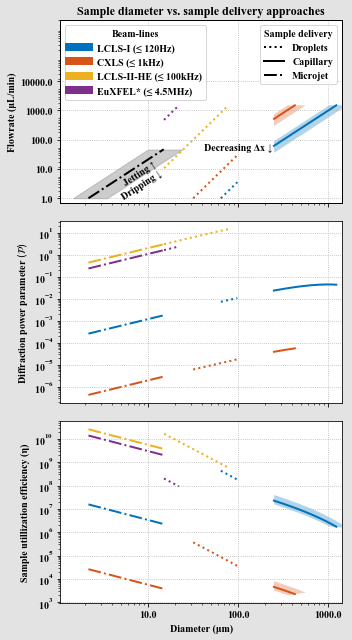

In [3]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Polygon
from matplotlib.gridspec import GridSpec

# Define custom RGB values for the start and end colors
start_color = (0.2, 0.4, 0.6)  # RGB values for the start color
end_color = (0.8, 0.6, 0.4)  # RGB values for the end color
mb = (0, 0.4470, 0.7410)
mr = (0.8500, 0.3250, 0.0980)
lmr = (0.9500, 0.7250, 0.5980)
lmb = (0.5, 0.7470, 0.8710)

# Create a custom gradient colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', [mb, 'gray', mr], N=11)
yticklabels_custom = ['SACLA', 'PALXFEL', 'LCLS-I', 'CXFEL', 'LCLS-II', 'EuXFEL*']


rc('font', family='Times New Roman')

# Define constants
rho = 1000
deltaP = 101325 / 10
energy = np.array([1,2e-4,2,0.006*4])
freq = np.array([120,1000,100000,4.5e6])
print(freq)
energy.shape = (len(energy), 1)
freq.shape = (len(freq), 1)

# Define flowrate range
Q = np.linspace((1/1500)**.5, 1, 600)**2*1500.0 * 1.6666666666666666666e-11
freq = freq + Q * 0
energy = energy+Q*0
Q = Q + freq * 0

# Calculate diameter for sphere drops
d_sphere = (6 / np.pi * Q / freq) ** (1 / 3)
d_sphere[(d_sphere < 15e-6) | (d_sphere > 100e-6)] = np.nan

deltaPmin = 1500
deltaPmax = 50000
# Calculate diameter for cylindrical jet
d_cylindrical = (Q / np.pi) ** 0.5 * (8 * rho / deltaP) ** 0.25
d_cylindrical_max = (Q / np.pi) ** 0.5 * (8 * rho / deltaPmin) ** 0.25
d_cylindrical_min = (Q / np.pi) ** 0.5 * (8 * rho / deltaPmax) ** 0.25

d_cylindrical_max[d_cylindrical_max>24e-6] = np.nan
d_cylindrical_min[d_cylindrical_min>15e-6] = np.nan
d_cylindrical[d_cylindrical>15e-6] = np.nan

d_capillary  = np.sqrt(4*Q/(freq*175e-6*np.pi))
d_capillary[d_capillary<250e-6] = np.nan
d_capillary_low  = np.sqrt(4*Q/(freq*100e-6*np.pi))
d_capillary_low[d_capillary_low<250e-6] = np.nan
d_capillary_high = np.sqrt(4*Q/(freq*250e-6*np.pi))
d_capillary_high[d_capillary_high<250e-6] = np.nan
# Calculate relative efficiency
mu = 1e-3
efficiency_sphere = d_sphere / Q * freq * energy * np.exp(-mu*d_sphere)
efficiency_cylindrical = d_cylindrical / Q * freq * energy * np.exp(-mu*d_cylindrical)
efficiency_capillary = d_capillary / Q * freq * energy * np.exp(-mu*d_capillary)

fig, ax = plt.subplots(3,1,figsize=(5,9))

gs = GridSpec(3, 1, height_ratios=[2, 1, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[2, 0])

fig.set_facecolor((228/255, 227/255, 227/255))

#######################################33
# Calculate relative efficiency
efficiency_sphere = d_sphere / Q * freq * energy * np.exp(-d_sphere/mu) * Q
efficiency_cylindrical = d_cylindrical / Q * freq * energy  * np.exp(-d_cylindrical/mu)*Q
efficiency_capillary = d_capillary / Q * freq * energy  * np.exp(-d_capillary/mu)*Q
efficiency_capillary_low = d_capillary_low / Q * freq * energy  * np.exp(-d_capillary_low/mu)*Q
efficiency_capillary_high = d_capillary_high / Q * freq * energy  * np.exp(-d_capillary_high/mu)*Q

labels = ['SACLA (30 Hz)', 'PAL-XFEL (60Hz)', 'LCLS-I (120Hz)', 'CXLS (1kHz)', 'LCLS-II (100kHz)', 'EuXFEL* (4.5MHz)']
labels = ['LCLS-I (≤ 120Hz)', 'CXLS (≤ 1kHz)', 'LCLS-II-HE (≤ 100kHz)', 'EuXFEL* (≤ 4.5MHz)']

# Plot diameter as a function of flowrate
arr = np.array([[0, 0.4470, 0.7410],
                [0.9800, 0.03250, 0.00980],
                [0.9290, 0.6940, 0.1250],
                [0, .75, 0],
                [0.3010, 0.7450, 0.9330],
                [1, 0.0780, 1]])

arr = np.array([
    [0.0, 0.4470, 0.7410],
    [0.8500, 0.3250, 0.0980],
    [0.9290, 0.6940, 0.1250],
    [0.4940, 0.1840, 0.5560],
    [0.4660, 0.6740, 0.1880],
    [0.3010, 0.7450, 0.9330],
    [0.6350, 0.0780, 0.1840]
])

for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax[1].loglog(d_sphere[i,:], efficiency_sphere[i,:], color=arr[i,:], linestyle=':', linewidth=2)
for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax[1].loglog(d_cylindrical[i,:], efficiency_cylindrical[i,:], color=arr[i,:], linestyle='-.', linewidth=2)
for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax[1].loglog(d_capillary[i,:], efficiency_capillary[i,:], color=arr[i,:], linestyle='-', linewidth=2)
    #ax[1].loglog(d_capillary_low[i,:], efficiency_capillary_low[i,:], color=arr[i,:], linestyle='-', linewidth=1)
    # Create a polygon representing the shaded area
    verts = [
        (d, e_low) for d, e_low in zip(d_capillary_low[i, :], efficiency_capillary_low[i, :])
    ] + [
        (d, e) for d, e in zip(d_capillary_high[i, :][::-1], efficiency_capillary_high[i, :][::-1])
    ]
    polygon = Polygon(verts, facecolor=arr[i, :], alpha=0.3)
    ax[1].add_patch(polygon)


# Add the polygon to the plot
ax[1].add_patch(polygon)
ax[1].set_xticklabels([])#(ax[1].get_xticks()  *1e6).round(2))
ax[1].set_xlim((1.049313315598029e-06,0.0014300087221708324))
#ax[1].set_xlabel('Diameter (μm)')
ax[1].set_ylabel('Diffraction power parameter $(\mathcal{P})$')# \equiv e^{-D/L_\mu}DEf)$')
ax[1].grid(True,linestyle='dotted')

####################################################

for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax[0].loglog(d_sphere[i,:], Q[0, :], color=arr[i,:], linestyle=':', linewidth=2)
ax[0].loglog(d_cylindrical[0,:], Q[0, :], color='black', linestyle='-.', linewidth=2)
ax[0].fill_betweenx(Q[0, :],d_cylindrical_min[0,:], d_cylindrical_max[0,:],color='gray', alpha=0.4)
for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax[0].loglog(d_capillary[i,:], Q[0, :], color=arr[i,:], linestyle='-', linewidth=2)
    #ax[0].loglog(d_capillary_low[i,:], Q[0, :], color=arr[i,:], linestyle='-', linewidth=1)
    # Create a polygon representing the shaded area
    verts = [
        (d, e_low) for d, e_low in zip(d_capillary_low[i, :], Q[i, :])
    ] + [
        (d, e) for d, e in zip(d_capillary_high[i, :][::-1], Q[i, :][::-1])
    ]
    polygon = Polygon(verts, facecolor=arr[i, :], alpha=0.3)
    ax[0].add_patch(polygon)
    
ax[0].set_ylim(np.array([0,.00000000002]) *1e6)

ax1 = ax[0].twiny()
ax1.set_xticklabels([])
ax1.set_xticks([])

for i in range(6):
    ax1.plot(0, np.nan, color=arr[i,:], linewidth=8)

leg1 = ax1.legend(labels,loc='upper left')
leg1.set_title('Beam-lines')


custom_lines = [
    Line2D([0], [0], linestyle=':', color='black', linewidth=2),
    Line2D([0], [0], linestyle='-', color='black', linewidth=2),
    Line2D([0], [0], linestyle='-.', color='black', linewidth=2)
]

labeline = ['Droplets', 'Capillary', 'Microjet']
ax2 = ax[0].twinx()
ax2.set_yticklabels([])
ax2.set_yticks([])

leg2 = ax2.legend(custom_lines,labeline,loc='upper right',bbox_to_anchor=(1, 1))
leg2.set_title('Sample delivery')

    
ax[0].set_ylabel('Flowrate (μL/min)')
ax[0].set_xticklabels((ax[0].get_xticks() *1e6).round(2))
ax[0].set_yticks(1.666666*10.0**np.arange(-11,-6))
ax[0].set_yticklabels(((ax[0].get_yticks() / 1.66667e-11).round(1)))
ax[0].grid(True,linestyle='dotted')
ax[0].set_title("Sample diameter vs. sample delivery approaches")
ax[0].set_xticklabels([])
#ax[0].set_xlabel('Flowrate (μL/min)')

ax[0].text(1.5e-5, .8*1.66667e-11, "Jetting ↑\nDripping ↓", rotation=33, va='bottom', ha='right')
ax[0].text(1.5e-5*16, 37*1.66667e-11, "Decreasing Δx ↓", rotation=0, va='bottom', ha='right')
ax[0].set_xlim((1.049313315598029e-06,0.0014300087221708324))

#######################################33
# Calculate relative efficiency
efficiency_sphere = d_sphere / Q * freq * energy * np.exp(-d_sphere/mu) 
efficiency_cylindrical = d_cylindrical / Q * freq * energy  * np.exp(-d_cylindrical/mu)
efficiency_capillary = d_capillary / Q * freq * energy  * np.exp(-d_capillary/mu)
efficiency_capillary_low = d_capillary_low / Q * freq * energy  * np.exp(-d_capillary_low/mu)
efficiency_capillary_high = d_capillary_high / Q * freq * energy  * np.exp(-d_capillary_high/mu)

labels = ['SACLA (30 Hz)', 'PAL-XFEL (60Hz)', 'LCLS-I (120Hz)', 'CXLS (1kHz)', 'LCLS-II (100kHz)', 'EuXFEL* (4.5MHz)']
labels = ['LCLS-I (≤ 120Hz)', 'CXLS (≤ 1kHz)', 'LCLS-II-HE (≤ 100kHz)', 'EuXFEL* (≤ 4.5MHz)']

# Plot diameter as a function of flowrate
arr = np.array([[0, 0.4470, 0.7410],
                [0.9800, 0.03250, 0.00980],
                [0.9290, 0.6940, 0.1250],
                [0, .75, 0],
                [0.3010, 0.7450, 0.9330],
                [1, 0.0780, 1]])

arr = np.array([
    [0.0, 0.4470, 0.7410],
    [0.8500, 0.3250, 0.0980],
    [0.9290, 0.6940, 0.1250],
    [0.4940, 0.1840, 0.5560],
    [0.4660, 0.6740, 0.1880],
    [0.3010, 0.7450, 0.9330],
    [0.6350, 0.0780, 0.1840]
])

for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax[2].loglog(d_sphere[i,:], efficiency_sphere[i,:], color=arr[i,:], linestyle=':', linewidth=2)
for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax[2].loglog(d_cylindrical[i,:], efficiency_cylindrical[i,:], color=arr[i,:], linestyle='-.', linewidth=2)
for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax[2].loglog(d_capillary[i,:], efficiency_capillary[i,:], color=arr[i,:], linestyle='-', linewidth=2)
    #ax[1].loglog(d_capillary_low[i,:], efficiency_capillary_low[i,:], color=arr[i,:], linestyle='-', linewidth=1)
    # Create a polygon representing the shaded area
    verts = [
        (d, e_low) for d, e_low in zip(d_capillary_low[i, :], efficiency_capillary_low[i, :])
    ] + [
        (d, e) for d, e in zip(d_capillary_high[i, :][::-1], efficiency_capillary_high[i, :][::-1])
    ]
    polygon = Polygon(verts, facecolor=arr[i, :], alpha=0.3)
    ax[2].add_patch(polygon)


# Add the polygon to the plot
ax[2].add_patch(polygon)
ax[2].set_xticklabels((ax[1].get_xticks()  *1e6).round(2))
ax[2].set_xlim((1.049313315598029e-06,0.0014300087221708324))
ax[2].set_xlabel('Diameter (μm)')
ax[2].set_ylabel('Sample utillization efficiency (η)')
ax[2].grid(True,linestyle='dotted')

####################################################
plt.tight_layout()
plt.savefig('Results/Efficiency_Plot.pdf', format='pdf', dpi=300)

plt.show()

[1.2e+02 1.0e+03 1.0e+05 4.5e+06]


/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:155: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


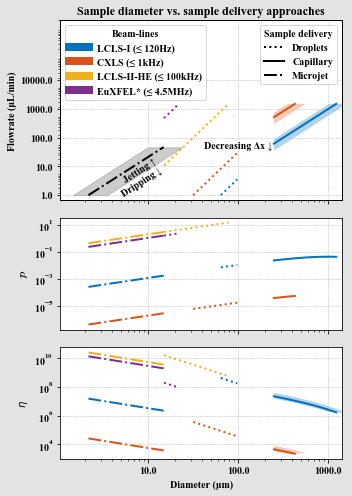

In [9]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Polygon
from matplotlib.gridspec import GridSpec

# Define custom RGB values for the start and end colors
start_color = (0.2, 0.4, 0.6)  # RGB values for the start color
end_color = (0.8, 0.6, 0.4)  # RGB values for the end color
mb = (0, 0.4470, 0.7410)
mr = (0.8500, 0.3250, 0.0980)
lmr = (0.9500, 0.7250, 0.5980)
lmb = (0.5, 0.7470, 0.8710)

# Create a custom gradient colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', [mb, 'gray', mr], N=11)
yticklabels_custom = ['SACLA', 'PALXFEL', 'LCLS-I', 'CXFEL', 'LCLS-II', 'EuXFEL*']


rc('font', family='Times New Roman')

# Define constants
rho = 1000
deltaP = 101325 / 10
energy = np.array([1,2e-4,2,0.006*4])
freq = np.array([120,1000,100000,4.5e6])
print(freq)
energy.shape = (len(energy), 1)
freq.shape = (len(freq), 1)

# Define flowrate range
Q = np.linspace((1/1500)**.5, 1, 600)**2*1500.0 * 1.6666666666666666666e-11
freq = freq + Q * 0
energy = energy+Q*0
Q = Q + freq * 0

# Calculate diameter for sphere drops
d_sphere = (6 / np.pi * Q / freq) ** (1 / 3)
d_sphere[(d_sphere < 15e-6) | (d_sphere > 100e-6)] = np.nan

deltaPmin = 1500
deltaPmax = 50000
# Calculate diameter for cylindrical jet
d_cylindrical = (Q / np.pi) ** 0.5 * (8 * rho / deltaP) ** 0.25
d_cylindrical_max = (Q / np.pi) ** 0.5 * (8 * rho / deltaPmin) ** 0.25
d_cylindrical_min = (Q / np.pi) ** 0.5 * (8 * rho / deltaPmax) ** 0.25

d_cylindrical_max[d_cylindrical_max>24e-6] = np.nan
d_cylindrical_min[d_cylindrical_min>15e-6] = np.nan
d_cylindrical[d_cylindrical>15e-6] = np.nan

d_capillary  = np.sqrt(4*Q/(freq*175e-6*np.pi))
d_capillary[d_capillary<250e-6] = np.nan
d_capillary_low  = np.sqrt(4*Q/(freq*100e-6*np.pi))
d_capillary_low[d_capillary_low<250e-6] = np.nan
d_capillary_high = np.sqrt(4*Q/(freq*250e-6*np.pi))
d_capillary_high[d_capillary_high<250e-6] = np.nan
# Calculate relative efficiency
mu = 1e-3
efficiency_sphere = d_sphere / Q * freq * energy * np.exp(-mu*d_sphere)
efficiency_cylindrical = d_cylindrical / Q * freq * energy * np.exp(-mu*d_cylindrical)
efficiency_capillary = d_capillary / Q * freq * energy * np.exp(-mu*d_capillary)

fig, ax = plt.subplots(3,1,figsize=(5,7))

gs = GridSpec(3, 1, height_ratios=[2, 1.25, 1.25])
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0])
ax2 = plt.subplot(gs[2, 0])

fig.set_facecolor((228/255, 227/255, 227/255))

#######################################33
# Calculate relative efficiency
efficiency_sphere = d_sphere / Q * freq * energy * np.exp(-d_sphere/mu) * Q
efficiency_cylindrical = d_cylindrical / Q * freq * energy  * np.exp(-d_cylindrical/mu)*Q
efficiency_capillary = d_capillary / Q * freq * energy  * np.exp(-d_capillary/mu)*Q
efficiency_capillary_low = d_capillary_low / Q * freq * energy  * np.exp(-d_capillary_low/mu)*Q
efficiency_capillary_high = d_capillary_high / Q * freq * energy  * np.exp(-d_capillary_high/mu)*Q

labels = ['SACLA (30 Hz)', 'PAL-XFEL (60Hz)', 'LCLS-I (120Hz)', 'CXLS (1kHz)', 'LCLS-II (100kHz)', 'EuXFEL* (4.5MHz)']
labels = ['LCLS-I (≤ 120Hz)', 'CXLS (≤ 1kHz)', 'LCLS-II-HE (≤ 100kHz)', 'EuXFEL* (≤ 4.5MHz)']

# Plot diameter as a function of flowrate
arr = np.array([[0, 0.4470, 0.7410],
                [0.9800, 0.03250, 0.00980],
                [0.9290, 0.6940, 0.1250],
                [0, .75, 0],
                [0.3010, 0.7450, 0.9330],
                [1, 0.0780, 1]])

arr = np.array([
    [0.0, 0.4470, 0.7410],
    [0.8500, 0.3250, 0.0980],
    [0.9290, 0.6940, 0.1250],
    [0.4940, 0.1840, 0.5560],
    [0.4660, 0.6740, 0.1880],
    [0.3010, 0.7450, 0.9330],
    [0.6350, 0.0780, 0.1840]
])

for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax1.loglog(d_sphere[i,:], efficiency_sphere[i,:], color=arr[i,:], linestyle=':', linewidth=2)
for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax1.loglog(d_cylindrical[i,:], efficiency_cylindrical[i,:], color=arr[i,:], linestyle='-.', linewidth=2)
for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax1.loglog(d_capillary[i,:], efficiency_capillary[i,:], color=arr[i,:], linestyle='-', linewidth=2)
    #ax1.loglog(d_capillary_low[i,:], efficiency_capillary_low[i,:], color=arr[i,:], linestyle='-', linewidth=1)
    # Create a polygon representing the shaded area
    verts = [
        (d, e_low) for d, e_low in zip(d_capillary_low[i, :], efficiency_capillary_low[i, :])
    ] + [
        (d, e) for d, e in zip(d_capillary_high[i, :][::-1], efficiency_capillary_high[i, :][::-1])
    ]
    polygon = Polygon(verts, facecolor=arr[i, :], alpha=0.3)
    ax1.add_patch(polygon)


# Add the polygon to the plot
ax1.add_patch(polygon)
ax1.set_xticklabels([])#(ax1.get_xticks()  *1e6).round(2))
ax1.set_xlim((1.049313315598029e-06,0.0014300087221708324))
#ax1.set_xlabel('Diameter (μm)')
ax1.set_ylabel('$\mathcal{P}$')# Diffraction power parameter \equiv e^{-D/L_\mu}DEf)$')
ax1.grid(True,linestyle='dotted')

####################################################

for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax0.loglog(d_sphere[i,:], Q[0, :], color=arr[i,:], linestyle=':', linewidth=2)
ax0.loglog(d_cylindrical[0,:], Q[0, :], color='black', linestyle='-.', linewidth=2)
ax0.fill_betweenx(Q[0, :],d_cylindrical_min[0,:], d_cylindrical_max[0,:],color='gray', alpha=0.4)
for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax0.loglog(d_capillary[i,:], Q[0, :], color=arr[i,:], linestyle='-', linewidth=2)
    #ax0.loglog(d_capillary_low[i,:], Q[0, :], color=arr[i,:], linestyle='-', linewidth=1)
    # Create a polygon representing the shaded area
    verts = [
        (d, e_low) for d, e_low in zip(d_capillary_low[i, :], Q[i, :])
    ] + [
        (d, e) for d, e in zip(d_capillary_high[i, :][::-1], Q[i, :][::-1])
    ]
    polygon = Polygon(verts, facecolor=arr[i, :], alpha=0.3)
    ax0.add_patch(polygon)
    
ax0.set_ylim(np.array([0,.00000000002]) *1e6)

ax1 = ax0.twiny()
ax1.set_xticklabels([])
ax1.set_xticks([])

for i in range(6):
    ax1.plot(0, np.nan, color=arr[i,:], linewidth=8)

leg1 = ax1.legend(labels,loc='upper left')
leg1.set_title('Beam-lines')


custom_lines = [
    Line2D([0], [0], linestyle=':', color='black', linewidth=2),
    Line2D([0], [0], linestyle='-', color='black', linewidth=2),
    Line2D([0], [0], linestyle='-.', color='black', linewidth=2)
]

labeline = ['Droplets', 'Capillary', 'Microjet']
ax3 = ax0.twinx()
ax3.set_yticklabels([])
ax3.set_yticks([])

leg2 = ax3.legend(custom_lines,labeline,loc='upper right',bbox_to_anchor=(1, 1))
leg2.set_title('Sample delivery')

    
ax0.set_ylabel('Flowrate (μL/min)')
ax0.set_xticklabels((ax0.get_xticks() *1e6).round(2))
ax0.set_yticks(1.666666*10.0**np.arange(-11,-6))
ax0.set_yticklabels(((ax0.get_yticks() / 1.66667e-11).round(1)))
ax0.grid(True,linestyle='dotted')
ax0.set_title("Sample diameter vs. sample delivery approaches")
ax0.set_xticklabels([])
#ax0.set_xlabel('Flowrate (μL/min)')

ax0.text(1.5e-5, .8*1.66667e-11, "Jetting ↑\nDripping ↓", rotation=33, va='bottom', ha='right')
ax0.text(1.5e-5*16, 37*1.66667e-11, "Decreasing Δx ↓", rotation=0, va='bottom', ha='right')
ax0.set_xlim((1.049313315598029e-06,0.0014300087221708324))

#######################################33
# Calculate relative efficiency
efficiency_sphere = d_sphere / Q * freq * energy * np.exp(-d_sphere/mu) 
efficiency_cylindrical = d_cylindrical / Q * freq * energy  * np.exp(-d_cylindrical/mu)
efficiency_capillary = d_capillary / Q * freq * energy  * np.exp(-d_capillary/mu)
efficiency_capillary_low = d_capillary_low / Q * freq * energy  * np.exp(-d_capillary_low/mu)
efficiency_capillary_high = d_capillary_high / Q * freq * energy  * np.exp(-d_capillary_high/mu)

labels = ['SACLA (30 Hz)', 'PAL-XFEL (60Hz)', 'LCLS-I (120Hz)', 'CXLS (1kHz)', 'LCLS-II (100kHz)', 'EuXFEL* (4.5MHz)']
labels = ['LCLS-I (≤ 120Hz)', 'CXLS (≤ 1kHz)', 'LCLS-II-HE (≤ 100kHz)', 'EuXFEL* (≤ 4.5MHz)']

# Plot diameter as a function of flowrate
arr = np.array([[0, 0.4470, 0.7410],
                [0.9800, 0.03250, 0.00980],
                [0.9290, 0.6940, 0.1250],
                [0, .75, 0],
                [0.3010, 0.7450, 0.9330],
                [1, 0.0780, 1]])

arr = np.array([
    [0.0, 0.4470, 0.7410],
    [0.8500, 0.3250, 0.0980],
    [0.9290, 0.6940, 0.1250],
    [0.4940, 0.1840, 0.5560],
    [0.4660, 0.6740, 0.1880],
    [0.3010, 0.7450, 0.9330],
    [0.6350, 0.0780, 0.1840]
])

for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax2.loglog(d_sphere[i,:], efficiency_sphere[i,:], color=arr[i,:], linestyle=':', linewidth=2)
for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax2.loglog(d_cylindrical[i,:], efficiency_cylindrical[i,:], color=arr[i,:], linestyle='-.', linewidth=2)
for i in range(len(labels)):# Plot diameter as a function of flowrate
    ax2.loglog(d_capillary[i,:], efficiency_capillary[i,:], color=arr[i,:], linestyle='-', linewidth=2)
    #ax1.loglog(d_capillary_low[i,:], efficiency_capillary_low[i,:], color=arr[i,:], linestyle='-', linewidth=1)
    # Create a polygon representing the shaded area
    verts = [
        (d, e_low) for d, e_low in zip(d_capillary_low[i, :], efficiency_capillary_low[i, :])
    ] + [
        (d, e) for d, e in zip(d_capillary_high[i, :][::-1], efficiency_capillary_high[i, :][::-1])
    ]
    polygon = Polygon(verts, facecolor=arr[i, :], alpha=0.3)
    ax2.add_patch(polygon)


# Add the polygon to the plot
ax2.add_patch(polygon)
ax2.set_xticklabels((ax2.get_xticks()  *1e6).round(2))
ax2.set_xlim((1.049313315598029e-06,0.0014300087221708324))
ax2.set_xlabel('Diameter (μm)')
ax2.set_ylabel('$\eta$')#Sample utillization efficiency
ax2.grid(True,linestyle='dotted')

####################################################
plt.tight_layout()
plt.savefig('Results/Efficiency_Plot.pdf', format='pdf', dpi=300)

plt.show()

TypeError: You must first set_array for mappable

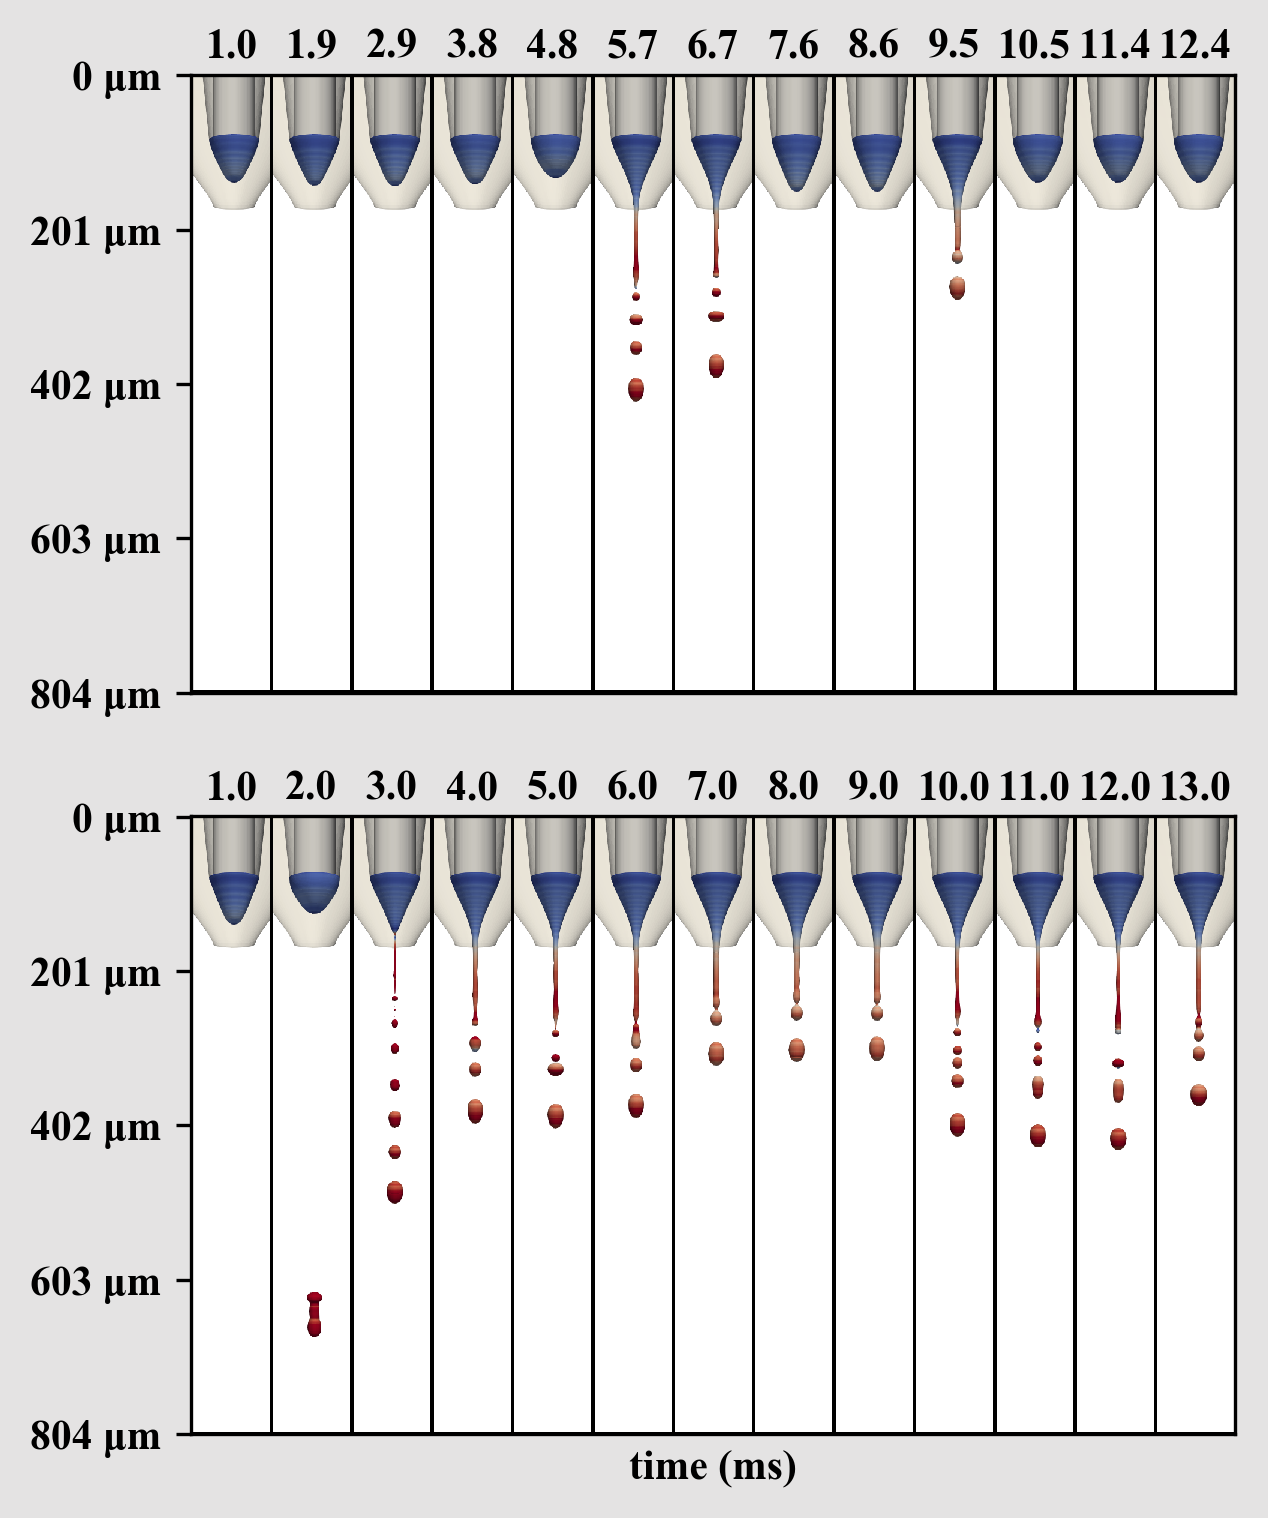

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

folders = ["/bioxfel/user/aansari2/axissymmetric_63/triggered/56_5/renders/", "/bioxfel/user/aansari2/axissymmetric_63/triggered/56_7/renders/"]
start_indices = [8, 6]
intervals = [19, 20]

fig, axs = plt.subplots(len(folders), 1, figsize=(5, 6), dpi=300)
fig.set_facecolor((228/255, 227/255, 227/255))

for i, (folder_path, start_index, interval) in enumerate(zip(folders, start_indices, intervals)):
    # Get the list of image files in the folder
    files = sorted([f for f in os.listdir(folder_path) if f.endswith('.png')])

    # Filter the files based on the start index and interval
    filtered_files = files[start_index::interval]

    # Load, crop, and resize the images
    images = []
    new_width = None
    for j, file_name in enumerate(filtered_files):
        image_path = os.path.join(folder_path, file_name)
        image = Image.open(image_path)
        width, height = image.size
        
        if new_width is None:
            new_width = width // 4  # Calculate the new width based on the first image

        # Calculate the cropping dimensions
        left = (width - new_width) // 2
        right = left + new_width

        # Crop the image
        cropped_image = image.crop((left, 0, right, height))

        # Create a new image with black borders
        bordered_image = Image.new("RGB", (new_width + 6, height + 6), color="black")
        bordered_image.paste(cropped_image, (3, 3))

        images.append(np.array(bordered_image))

        # Add sequential numbering to x-axis tick labels
        axs[i].text(j * (new_width + 6) + (new_width + 6) / 2, -30, f"{((j + 1)*intervals[i]*.050):.1f}", ha='center')

    combined_image = np.concatenate(images, axis=1)

    # Display the combined image in a subplot
    test = axs[i].imshow(combined_image)
    
    # Calculate the number of pixels per 100 um
    pixels_per_100um = new_width / 100
    
    # Set the y-axis tick positions and labels
    num_ticks = 5  # You can adjust the number of tick marks as needed
    tick_positions = np.linspace(0, combined_image.shape[0], num_ticks)
    tick_labels = [f"{int(y / pixels_per_100um)} μm" for y in tick_positions]
    
    axs[i].set_yticks(tick_positions)
    axs[i].set_yticklabels(tick_labels)

# Set x-axis tick labels
    axs[i].set_xticks([])#[(j + 0.5) * (new_width + 6) for j in range(len(filtered_files))])
    axs[i].set_xticklabels([])#[str(j + 1) for j in range(len(filtered_files))])
axs[-1].set_xlabel('time (ms)')


# Define a colormap (e.g., 'viridis')
cmap = plt.get_cmap('viridis')

# Create a color bar using the colormap
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax)
# Customize color bar label and placement
cbar.set_label('Color Scale', rotation=270, labelpad=15)
cbar.ax.get_yaxis().labelpad = 20

plt.tight_layout()
plt.savefig('comparison_56.pdf', format='pdf', dpi=300)
plt.show()


In [39]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul  4 22:24:08 2023

@author: aansa
"""

# -*- coding: utf-8 -*-
"""
Created on Tue Jun 20 19:42:39 2023

@author: aansa
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap


# Read the CSV file into a pandas DataFrame
data = pd.read_csv("Book1_stdev - 63_new.csv")

# Filter the DataFrame based on the conditions: frequency_est is not empty and piezo column is '0'
filtered_data = data[(data['frequency_est'].notna()) | (data['piezo'] == '0')]

# Extract the desired columns: HeliumMassFlowRate_mgPERmin, LiqVolFlowRate_uLPERmin, frequency_est, and drip_spurt
extracted_data = filtered_data[['HeliumMassFlowRate_mgPERmin', 'LiqVolFlowRate_uLPERmin', 'frequency_est', 'drip_spurt']]

# Convert the 'frequency_est' column to numeric
extracted_data['frequency_est'] = pd.to_numeric(extracted_data['frequency_est'], errors='coerce')

# Create a contour plot
fig = plt.figure(figsize=(5, 4))
fig.set_facecolor((228/255, 227/255, 227/255))

ax = fig.add_subplot(111)

# Create a grid of x and y values
x = extracted_data['HeliumMassFlowRate_mgPERmin']
y = extracted_data['LiqVolFlowRate_uLPERmin']
z = extracted_data['frequency_est']
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(xi, yi)

# Interpolate the frequency_est values on the grid using griddata
Z = griddata((x, y), z, (X, Y), method='linear')

# Define custom RGB values for the start and end colors
start_color = (0.2, 0.4, 0.6)  # RGB values for the start color
end_color = (0.8, 0.6, 0.4)  # RGB values for the end color
mb = (0, 0.4470, 0.7410)
mr = (0.8500, 0.3250, 0.0980)
lmr = (0.9500, 0.7250, 0.5980)
lmb = (0.5, 0.7470, 0.8710)

# Create a custom gradient colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', [lmb, 'white', lmr], N=11)


# Create the contour plot with custom contour levels and labels
levels = np.arange(500, 2001, 250)
contour = ax.contourf(X, Y, Z, levels=levels, cmap=cmap)
contour_labels = ax.contour(X, Y, Z, levels=levels, colors='black', linewidths=0.5)
ax.clabel(contour_labels, inline=True, fontsize=8, fmt='%d', use_clabeltext=True)

# Create a scatter plot based on 'drip_spurt' values
scatter_data = extracted_data[extracted_data['drip_spurt'].isin(['d', 'sp', 'dws'])]
drip_spurt_values = scatter_data['drip_spurt']
drip_spurt_markers = {'d': 'o', 'sp': '|', 'dws': 's'}
for spurt, marker in drip_spurt_markers.items():
    spurt_data = scatter_data[scatter_data['drip_spurt'] == spurt]
    ax.scatter(spurt_data['HeliumMassFlowRate_mgPERmin'], spurt_data['LiqVolFlowRate_uLPERmin'], marker='|', color='black', label=spurt)

# Create legend elements with custom labels and markers
legend_elements = [plt.Line2D([0], [0], marker='o', color='k', markerfacecolor='black', markersize=8, label='Dripping', linestyle=''),
                   plt.Line2D([0], [0], marker='|', color='k', markerfacecolor='black', markersize=8, label='Spurting', linestyle=''),
                   plt.Line2D([0], [0], marker='s', color='k', markerfacecolor='black', markersize=8, label='Dripping with spurting', linestyle='')]

ax.set_ylim([2.9, 5.1])
ax.set_xlim([1.9, 10.1])

# Add a legend with custom labels and markers
#ax.legend(handles=legend_elements)

# Add a colorbar
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Frequency (Hz)')

# Set labels and title
ax.set_xlabel('Helium Mass Flow Rate (mg/min)')
ax.set_ylabel('Liquid Flow Rate (µL/min)')
#ax.set_title('Contour Plot with Scatter')

# Set font to Times New Roman

fig1 = plt.gcf()
plt.draw()
# Show the plot
fig1.savefig('Results/drippingPlot.pdf', format='pdf')
plt.show()


/tmp/ipykernel_224741/2643737652.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['frequency_est'] = pd.to_numeric(extracted_data['frequency_est'], errors='coerce')


/tmp/ipykernel_224741/2358480787.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['frequency_est'] = pd.to_numeric(extracted_data['frequency_est'], errors='coerce')


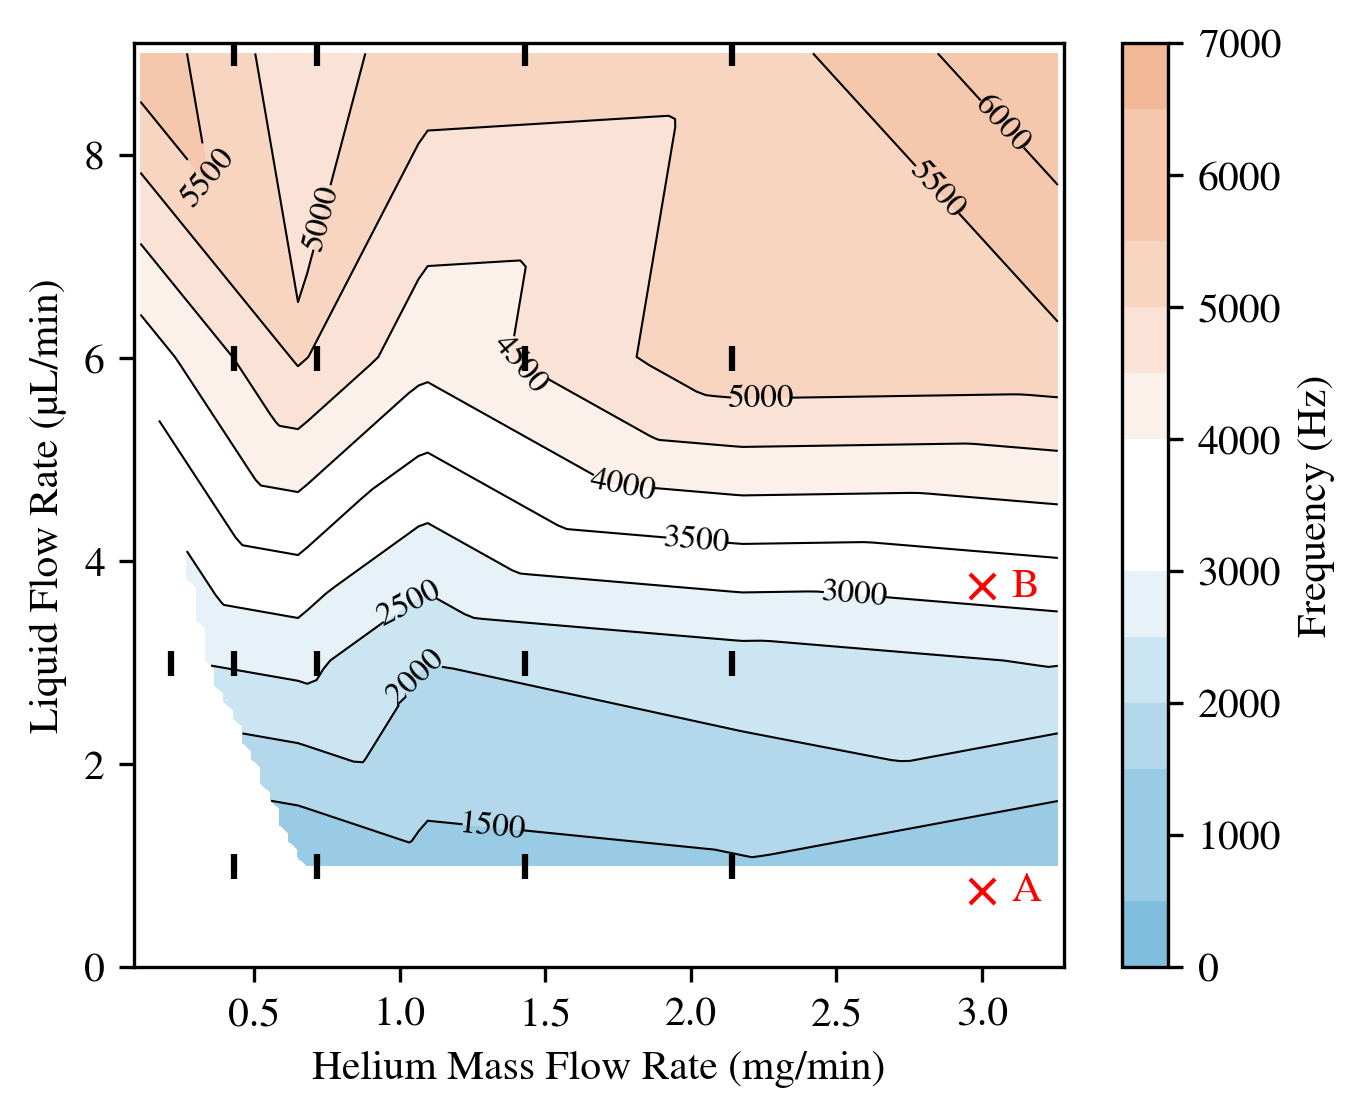

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap


# Read the CSV file into a pandas DataFrame
data = pd.read_csv("Book1_stdev56.csv")

# Filter the DataFrame based on the conditions: frequency_est is not empty and piezo column is '0'
filtered_data = data[(data['frequency_est'].notna()) | (data['piezo'] == '0')]

# Extract the desired columns: HeliumMassFlowRate_mgPERmin, LiqVolFlowRate_uLPERmin, frequency_est, and drip_spurt
extracted_data = filtered_data[['HeliumMassFlowRate_mgPERmin', 'LiqVolFlowRate_uLPERmin', 'frequency_est', 'drip_spurt']]

# Convert the 'frequency_est' column to numeric
extracted_data['frequency_est'] = pd.to_numeric(extracted_data['frequency_est'], errors='coerce')

# Create a contour plot
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)

# Create a grid of x and y values
x = extracted_data['HeliumMassFlowRate_mgPERmin']/4.6
y = extracted_data['LiqVolFlowRate_uLPERmin']
z = extracted_data['frequency_est']
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(xi, yi)

# Interpolate the frequency_est values on the grid using griddata
Z = griddata((x, y), z, (X, Y), method='linear')

# Define custom RGB values for the start and end colors
start_color = (0.2, 0.4, 0.6)  # RGB values for the start color
end_color = (0.8, 0.6, 0.4)  # RGB values for the end color
mb = (0, 0.4470, 0.7410)
mr = (0.8500, 0.3250, 0.0980)
lmr = (0.9500, 0.7250, 0.5980)
lmb = (0.5, 0.7470, 0.8710)

# Create a custom gradient colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', [lmb, 'white', lmr], N=11)


# Create the contour plot with custom contour levels and labels
levels = np.arange(0, 7001, 500)
contour = ax.contourf(X, Y, Z, levels=levels, cmap=cmap)
contour_labels = ax.contour(X, Y, Z, levels=levels, colors='black', linewidths=0.5)
ax.clabel(contour_labels, inline=True, fontsize=8, fmt='%d', use_clabeltext=True)

# Create a scatter plot based on 'drip_spurt' values
scatter_data = extracted_data[extracted_data['drip_spurt'].isin(['d', 'sp', 'dws'])]
drip_spurt_values = scatter_data['drip_spurt']
drip_spurt_markers = {'d': 'o', 'sp': '|', 'dws': 's'}
for spurt, marker in drip_spurt_markers.items():
    spurt_data = scatter_data[scatter_data['drip_spurt'] == spurt]
    ax.scatter(spurt_data['HeliumMassFlowRate_mgPERmin']/7, spurt_data['LiqVolFlowRate_uLPERmin'], marker=marker, color='black', label=spurt)

# Create legend elements with custom labels and markers
legend_elements = [plt.Line2D([0], [0], marker='o', color='k', markerfacecolor='black', markersize=8, label='Dripping', linestyle=''),
                   plt.Line2D([0], [0], marker='|', color='k', markerfacecolor='black', markersize=8, label='Spurting', linestyle=''),
                   plt.Line2D([0], [0], marker='s', color='k', markerfacecolor='black', markersize=8, label='Dripping with spurting', linestyle='')]

ax.set_ylim([0, 9.1])
ax.set_xlim(np.array([0.4, 15.1])/4.6)

# Add a legend with custom labels and markers
# ax.legend(handles=legend_elements)


xdat = [3,3]
ydat = [0.75,3.75]
fdat = [950,4500]
for i in range(2):
    x = xdat[i]
    y = ydat[i]
    f = fdat[i]
    #circle = plt.Circle((x, y), radius=0.1, fill=False, color=mr)  # Adjust the radius as desired
    ax.plot(x,y,'rx')#add_patch(circle)
    text = "AB"#f"f({x} mg/min, {y} μL/min) = {f} Hz"
    ax.text(x + 0.1, y-0, text[i], fontsize=10, verticalalignment='center',color="red")
# Add a colorbar
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Frequency (Hz)')

# Set labels and title
ax.set_xlabel('Helium Mass Flow Rate (mg/min)')
ax.set_ylabel('Liquid Flow Rate (µL/min)')

# Set font to Times New Roman
plt.rcParams['font.family'] = 'Nimbus Roman'

# Show the plot
plt.savefig('Results/drippingPlot2.pdf', format='pdf')
plt.show()


/tmp/ipykernel_224741/1781114969.py:46: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interpolate.interp2d(y, t.ravel(), remainder_columns, kind='linear')
/tmp/ipykernel_224741/1781114969.py:48: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

    

Rising Edge Indices: [0.0002241  0.00021962 0.00022472 0.00021974 0.00022087 0.00022076
 0.00021876 0.0002203  0.0002189  0.00022035 0.0002196  0.00021985
 0.00022147 0.00021918 0.00021778] 0.00022039999999999996 1.8099576422300062e-06


/tmp/ipykernel_224741/1781114969.py:46: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interpolate.interp2d(y, t.ravel(), remainder_columns, kind='linear')
/tmp/ipykernel_224741/1781114969.py:48: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

    

Rising Edge Indices: [0.0002258  0.00022247 0.00022598 0.0002192  0.00022075 0.00021868
 0.00021844 0.00022007 0.00021975 0.00022126 0.00021978 0.00021905
 0.00022366 0.00021983 0.00021927] 0.00022093266666666666 2.371990631422472e-06


/tmp/ipykernel_224741/1781114969.py:46: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interpolate.interp2d(y, t.ravel(), remainder_columns, kind='linear')
/tmp/ipykernel_224741/1781114969.py:48: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

    

Rising Edge Indices: [2.2125e-04 2.2470e-04 2.2459e-04 2.2081e-04 2.2073e-04 2.2162e-04
 2.2290e-04 2.2347e-04 7.0140e-05 1.5172e-04 2.2283e-04 2.2060e-04
 2.2550e-04 2.2513e-04 2.2333e-04 2.2261e-04 7.2340e-05 1.5047e-04
 2.2346e-04 7.0580e-05 1.4970e-04 2.1986e-04 2.2806e-04 2.2793e-04
 2.2569e-04 2.2296e-04 2.2060e-04 2.2622e-04 2.2375e-04 2.2246e-04
 2.2101e-04] 0.0002015167741935484 4.779963688531923e-05


/tmp/ipykernel_224741/1781114969.py:46: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interpolate.interp2d(y, t.ravel(), remainder_columns, kind='linear')
/tmp/ipykernel_224741/1781114969.py:48: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

    

Rising Edge Indices: [0.00024739 0.00024937 0.00024957 0.00024777 0.00024908 0.00024847
 0.00025269 0.00025042 0.00024902 0.00024819 0.00025112 0.00025444
 0.00025079 0.00024634 0.0002485  0.00025395 0.00025778 0.00025186
 0.00024955 0.00025028 0.00024954 0.00025567 0.00024876 0.00024761
 0.0002477  0.00024514 0.00024714 0.00024702 0.00024981 0.00025618
 0.00026381 0.00025621] 0.00025066156250000003 3.886657552910152e-06
done


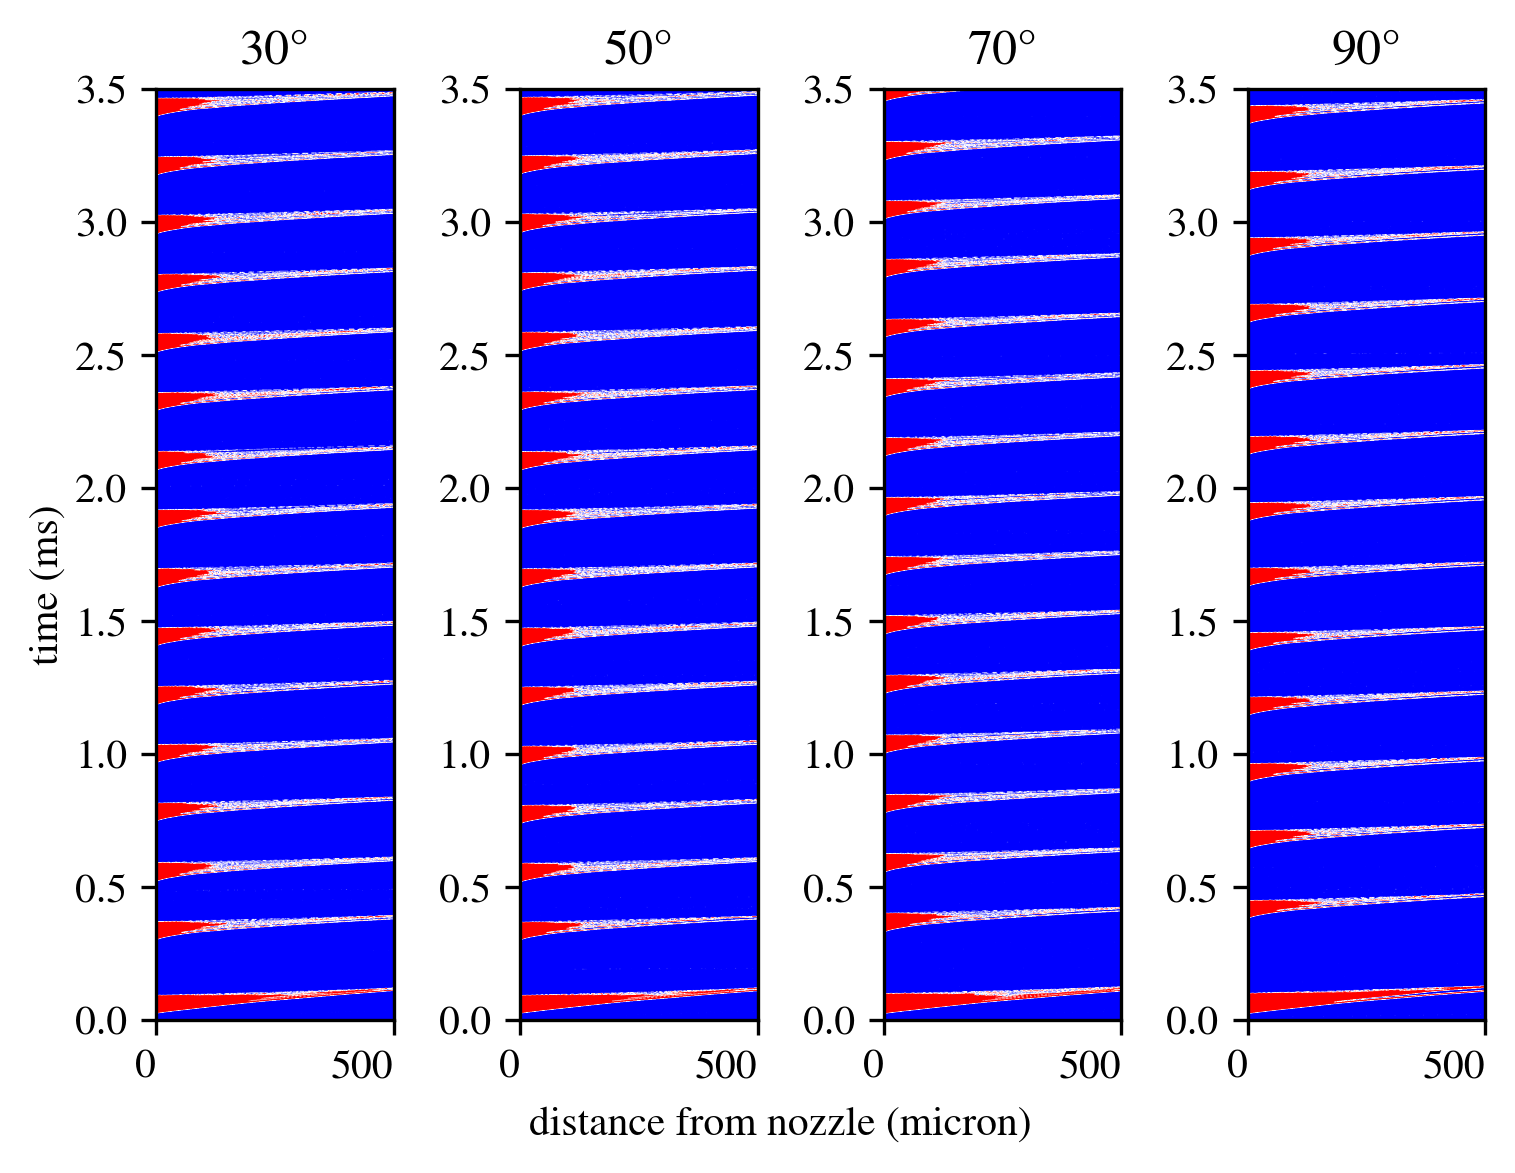

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy import interpolate
plt.rcParams['font.family'] = 'Nimbus Roman'


# Define a list of file paths without the first slash
file_paths = ['/data/bioxfel/user/aansari2/axissymmetric_63/triggered/contactAngleTests/56_30/postProcessing/probes/0/alpha.water',
              '/data/bioxfel/user/aansari2/axissymmetric_63/triggered/contactAngleTests/56_50/postProcessing/probes/0/alpha.water',
              '/data/bioxfel/user/aansari2/axissymmetric_63/triggered/contactAngleTests/56_70/postProcessing/probes/0/alpha.water',
              '/data/bioxfel/user/aansari2/axissymmetric_63/triggered/contactAngleTests/56_90/postProcessing/probes/0/alpha.water']

# Define the angles corresponding to each file path
angles = [30, 50, 70, 90]

# Create a figure with four subplots
fig, axes = plt.subplots(1, 4, figsize=(5, 4))
fig.subplots_adjust(hspace=0.4)

for i, (file_path, angle) in enumerate(zip(file_paths, angles)):
    # Read file starting from line 104
    with open(file_path, 'r') as file:
        for _ in range(503):  # Skip lines 1 to 103
            next(file)
        numbers = []
        for line in file:
            values = line.strip().split()
            numbers.append([float(value) for value in values])

    # Convert numbers to a 2D NumPy array
    np_array = np.array(numbers)

    t = np_array[:, 0]  # Extract the first column
    remainder_columns = np_array[:, 1:]  # Extract the remainder of the columns

    y =np.arange(0, 501, dtype=int)  # Adjust y values to go from 0 to 500
    
    t_eq = np.linspace(0,np.max(t),len(t))

    norm = mcolors.Normalize(vmin=0, vmax=1)

    # Create a meshgrid from t and y
    Y, T = np.meshgrid(y, t.ravel())
    
    f = interpolate.interp2d(y, t.ravel(), remainder_columns, kind='linear')
    
    znew = f(y, t_eq)
    #zi = griddata((X2, Y2), remainder_columns, (X, Y), method='cubic')
    #print(zi.shape)
    #print(remainder_columns.shape)

    # Select the appropriate subplot for this iteration
    ax = axes[i]

    ax.set_ylim(0, 3.5)  # Set the y-axis limits
    ax.set_title('{}°'.format(angle))  # Set the subplot title
    ax.set_xticks([y[0], y[-1]])
    ax.set_xticklabels(ax.get_xticks(), ha='right')
    ax.set_xlabel(" ")
    # Create the contour plot on the selected subplot
    #contour = ax.contourf(Y, T*1e3, znew, cmap='jet', norm=norm)
    ax.imshow(znew,extent=[np.min(Y), np.max(Y), np.min(T)*1e3, np.max(T)*1e3],origin='lower', aspect='auto',cmap='bwr')
    #ax.plot(t_eq,  znew[:, 1])
    
    #fft_rows = np.fft.fft(znew, axis=0)
    #ax.set_ylim(0, 50)  # Set the y-axis limits
    #ax.contourf(np.log(np.abs(fft_rows)))
    #print(t_eq[2]-t_eq[1], np.max(t), len(t))
    
    
    ######
    # Set a threshold to filter out noise
    threshold = 0.5  # Adjust this threshold as needed
    
    # Initialize variables to keep track of rising edge indices
    rising_edge_indices = []
    
    # Iterate through the data to detect rising edges
    for i in range(1, len( np_array[:, 1])):
        if np_array[i, 1] - np_array[i-1, 1] > threshold:
            rising_edge_indices.append(i)
    
    # Print the indices of rising edges
    res = t[rising_edge_indices];
    res = res[res>0.002]
    ctime = np.diff(res)
    print("Rising Edge Indices:", ctime, np.mean(ctime), np.std(ctime))
    
    #ax.plot(ctime,'o')
    ######
    #if i!=0:
      #ax.tick_params(axis='y', which='both', left=False, labelleft=False)  # Remove y-ticks and labels on the second subplot
      

     #fig.colorbar(contour, ax=ax)  # Add a colorbar for reference on the subplot
fig.text(0.5, 0.05, 'distance from nozzle (micron)', ha='center', va='center')
fig.text(0.0, 0.5, 'time (ms)', va='center', rotation='vertical')
plt.tight_layout()


plt.savefig('drippingvscangle.pdf', format='pdf', dpi=300)
print("done")
plt.show()  # Show the plot


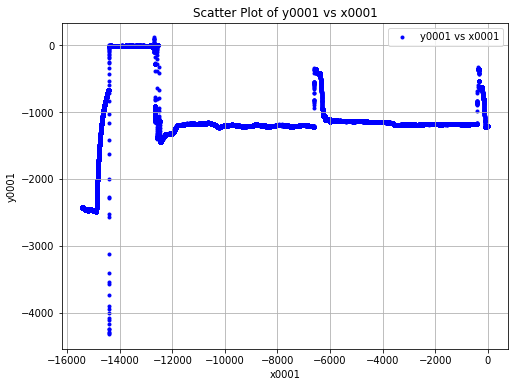

In [19]:
import csv
import matplotlib.pyplot as plt

# Initialize lists to store x0001 and y0001 values
x0001 = []
y0001 = []

# Read the CSV file and extract data
csv_file = '/bioxfel/data/kirianlab/projects/triggered-droplets/20231004/florate1042023.csv'
with open(csv_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        x0001.append(float(row['x0001']))
        y0001.append(float(row['y0001']))

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x0001, y0001, marker='.', color='blue', label='y0001 vs x0001')
plt.xlabel('x0001')
plt.ylabel('y0001')
plt.title('Scatter Plot of y0001 vs x0001')
plt.grid(True)
plt.legend()

# Set the x-axis limits
#plt.xlim(-10000, -7000)  # pump Replace with your desired x-axis limits
#plt.xlim(-3500, -500) # pump with bubble
#plt.ylim(-1000, -1500)
plt.show()


In [4]:
import csv
import matplotlib.pyplot as plt

# Initialize lists to store x0001 and y0001 values for the first CSV file
x0001 = []
y0001 = []

# Read the first CSV file and extract data
csv_file1 = '/bioxfel/data/kirianlab/projects/triggered-droplets/20231003/flowrateDegassed2k.csv'
with open(csv_file1, 'r') as file1:
    reader1 = csv.DictReader(file1)
    for row in reader1:
        x0001.append(float(row['x0001']))
        y0001.append(float(row['y0001']))

# Initialize lists to store x0001 and y0001 values for the second CSV file
x0001_2 = []
y0001_2 = []

# Read the second CSV file and extract data
csv_file2 = '/bioxfel/data/kirianlab/projects/triggered-droplets/20231004/florate1042023.csv'
with open(csv_file2, 'r') as file2:
    reader2 = csv.DictReader(file2)
    for row in reader2:
        x0001_2.append(float(row['x0001']))
        y0001_2.append(float(row['y0001']))

# Create a scatter plot for the first CSV file
plt.figure(figsize=(12, 6))

# Plot data from the first CSV file
plt.scatter(x0001, y0001, marker='.', color='blue', label='y0001 vs x0001 (File 1)')

# Set x-axis and y-axis labels
plt.xlabel('x0001')
plt.ylabel('y0001')
plt.title('Scatter Plot of y0001 vs x0001 (File 1)')
plt.grid(True)

# Set the x-axis limits for the first CSV file
#plt.xlim(-2979, -2977)  # Replace with your desired x-axis limits for the first file

# Create a scatter plot for the second CSV file

# Plot data from the second CSV file
plt.scatter(x0001_2, y0001_2, marker='.', color='red', label='y0001 vs x0001 (File 2)')

# Set x-axis and y-axis labels for the second CSV file
plt.xlabel('x0001')
plt.ylabel('y0001')
plt.title('Scatter Plot of y0001 vs x0001 (File 2)')
plt.grid(True)

# Set the x-axis limits for the second CSV file
plt.xlim(-12500, -9600)  # Set x-axis limits for the second file

# Show the legend
plt.legend()

# Display both plots
plt.show()


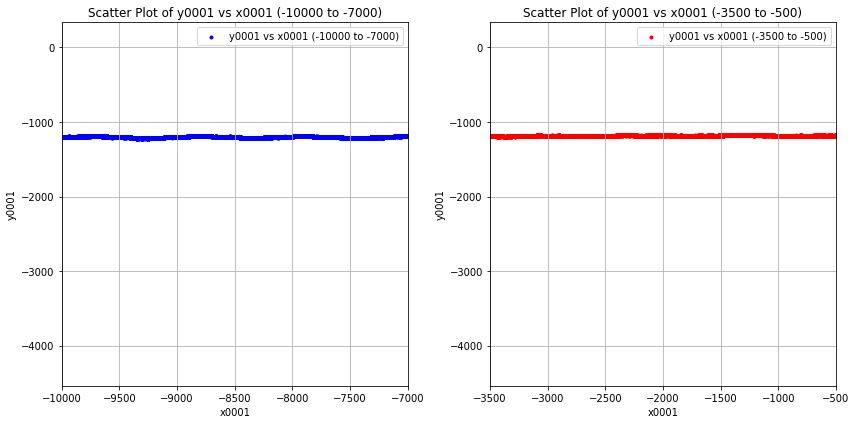

In [28]:
import csv
import matplotlib.pyplot as plt

# Initialize lists to store x0001 and y0001 values
x0001 = []
y0001 = []

# Read the CSV file and extract data
csv_file = '/bioxfel/data/kirianlab/projects/triggered-droplets/20231004/florate1042023.csv'
with open(csv_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        x0001.append(float(row['x0001']))
        y0001.append(float(row['y0001']))

# Create two separate plots

# Plot with x0001 values from -10000 to -7000
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot with 1 row and 2 columns, first subplot
plt.scatter(x0001, y0001, marker='.', color='blue', label='y0001 vs x0001 (-10000 to -7000)')
plt.xlabel('x0001')
plt.ylabel('y0001')
plt.title('Scatter Plot of y0001 vs x0001 (-10000 to -7000)')
plt.grid(True)
plt.xlim(-10000, -7000)  # Set x-axis limits for the first plot
plt.legend()

# Plot with x0001 values from -3500 to -500
plt.subplot(1, 2, 2)  # Second subplot
plt.scatter(x0001, y0001, marker='.', color='red', label='y0001 vs x0001 (-3500 to -500)')
plt.xlabel('x0001')
plt.ylabel('y0001')
plt.title('Scatter Plot of y0001 vs x0001 (-3500 to -500)')
plt.grid(True)
plt.xlim(-3500, -500)  # Set x-axis limits for the second plot
plt.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show both plots
plt.show()


done


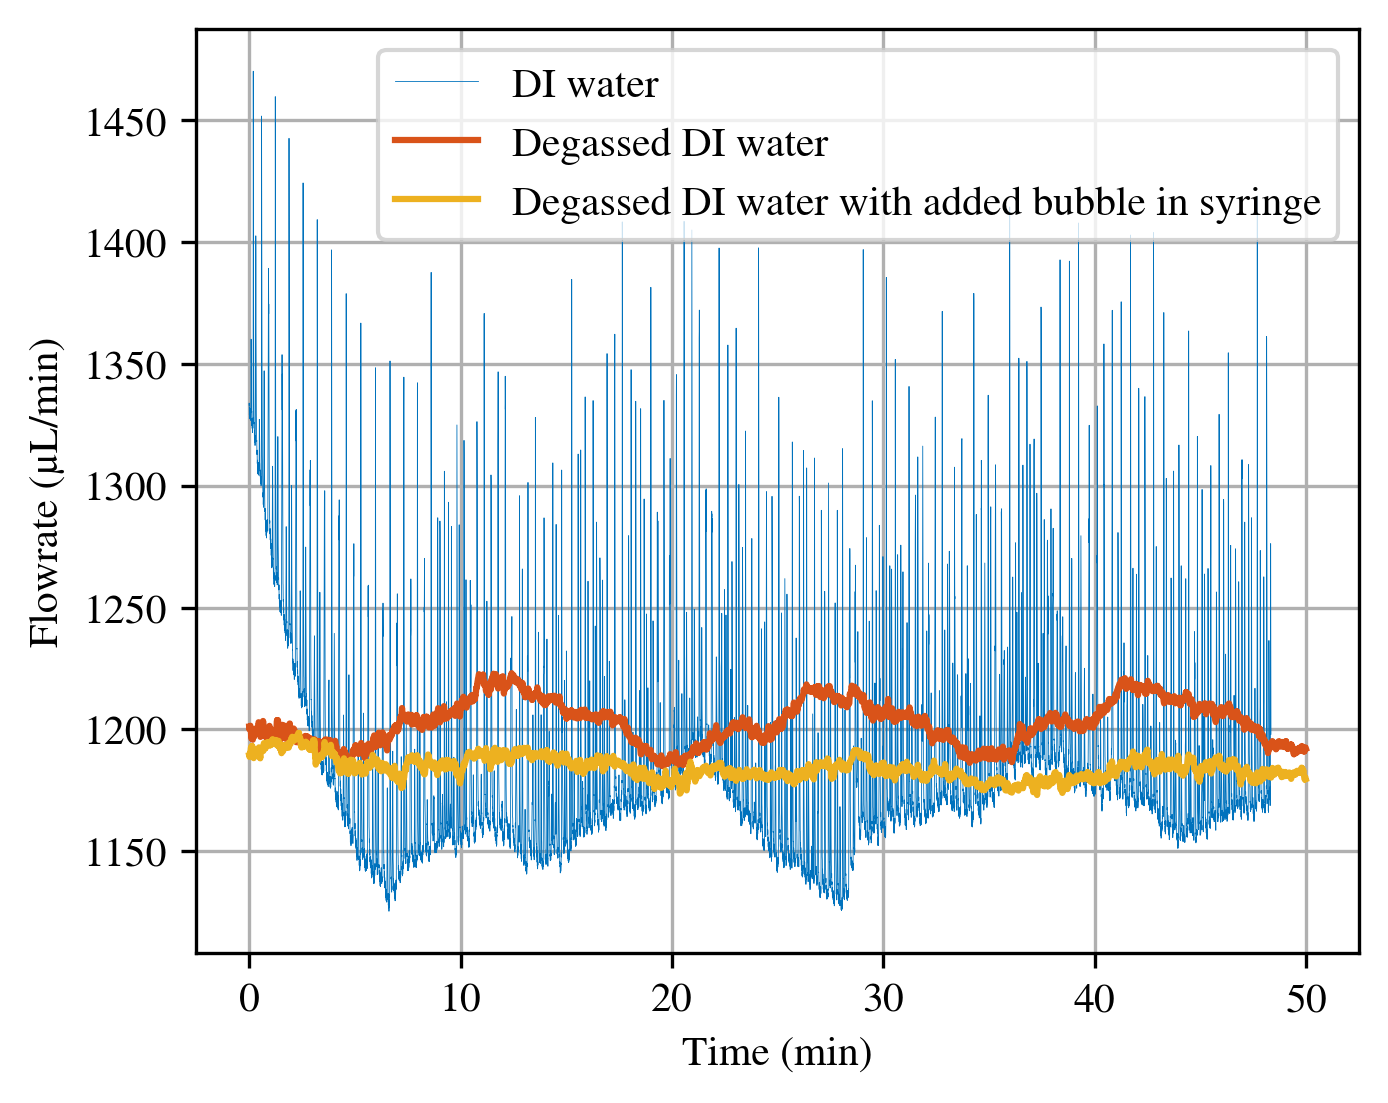

In [38]:
import csv
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Nimbus Roman'
import numpy as np

arr = np.array([
    [0.0, 0.4470, 0.7410],
    [0.8500, 0.3250, 0.0980],
    [0.9290, 0.6940, 0.1250],
    [0.4940, 0.1840, 0.5560],
    [0.4660, 0.6740, 0.1880],
    [0.3010, 0.7450, 0.9330],
    [0.6350, 0.0780, 0.1840]
])

# Initialize lists to store x0001 and y0001 values
x0001 = []
y0001 = []

# Read the CSV file and extract data
csv_file = '/data/bioxfel/data/kirianlab/projects/triggered-droplets/20231003/flowrateDegassed2k.csv'
with open(csv_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        x0001.append(float(row['x0001']))
        y0001.append(float(row['y0001']))

# Convert the data to NumPy arrays for easier manipulation
x0001 = np.array(x0001)
y0001 = np.array(y0001)

# Define the data ranges
x_range1 = (x0001 >= -12500) & (x0001 <= -9600)

x_range1_values = x0001[x_range1]

# Create a scatter plot for both data ranges on the same plot
plt.figure(figsize=(5, 4))

# Plot the data range from the second CSV file
plt.plot((x_range1_values - x_range1_values[0]) / 60, -y0001[x_range1], color=arr[0,:], label='DI water', linewidth=.2)

# Initialize lists to store x0001 and y0001 values
x0001 = []
y0001 = []

# Read the CSV file and extract data
csv_file = '/data/bioxfel/data/kirianlab/projects/triggered-droplets/20231004/florate1042023.csv'
with open(csv_file, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        x0001.append(float(row['x0001']))
        y0001.append(float(row['y0001']))

# Convert the data to NumPy arrays for easier manipulation
x0001 = np.array(x0001)
y0001 = np.array(y0001)

# Define the data ranges
x_range1 = (x0001 >= -10000) & (x0001 <= -7000)
x_range2 = (x0001 >= -3500) & (x0001 <= -500)

x_range1_values = x0001[x_range1]
x_range2_values = x0001[x_range2]

# Plot the first data range
plt.plot((x_range1_values - x_range1_values[0]) / 60, -y0001[x_range1], color=arr[1,:], label='Degassed DI water')

# Plot the second data range
plt.plot((x_range2_values - x_range2_values[0]) / 60, -y0001[x_range2], color=arr[2,:], label='Degassed DI water with added bubble in syringe')


# Set x-axis and y-axis labels
plt.xlabel('Time (min)')
plt.ylabel('Flowrate (μL/min)')
plt.grid(True)

# Show the legend
plt.legend()

plt.savefig('Results/drippingflowrate.pdf', format='pdf', dpi=300)
print("done")
plt.show()  # Show the plot

In [21]:
import numpy as np
import matplotlib.pyplot as plt

numberOfPixels = 257
Length = 25400/4/10

# Load the data
timed56, eject56, meansh56 = np.load('56anim.npy')
timed63, eject63, meansh63 = np.load('63anim.npy')

# Create a figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot mean values on the first y-axis
ax1.plot(timed56, meansh56, label='56anim Mean', color='b')
ax1.plot(timed63, meansh63, label='63anim Mean', color='g')
ax1.set_xlabel('Time')
ax1.set_ylabel('Mean Value', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a twin y-axis for 'Eject' values
ax2 = ax1.twinx()
ax2.plot(timed56, eject56, label='56anim Eject', color='r')
ax2.plot(timed63, eject63, label='63anim Eject', color='c')
ax2.set_ylabel('Eject Value', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels)

plt.title('Mean and Eject Values Over Time')
plt.grid(True)
plt.show()
